In [1]:
import os
os.chdir('E:/final_dataset/')
import numpy as np
import pandas as pd
import pickle
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()
import matplotlib
from scipy import sparse
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from statannot import add_stat_annotation
import scanpy as sc
import anndata
sc.settings.set_figure_params(dpi=100, facecolor='white')
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
import scanpy.external as sce
import sys
import pingouin as pg
%matplotlib inline
sc.logging.print_header()
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")
sns.set_style("ticks")
import umap
import sklearn.cluster as cluster

scanpy==1.9.1 anndata==0.9.1 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 pynndescent==0.5.10


In [2]:
neuall = sc.read_h5ad('10x_cn_neuron_mtx/cn_neurons.h5ad')
pseq = sc.read_h5ad('patchseq_mtx/patchseq.dataset.final.h5ad')

In [3]:
t_ref = neuall[neuall.obs['clusters'].isin(['T-stellate'])].copy()
t_ref = t_ref[t_ref.obs['subclusters'].isin(['T-Fn1','T-Dchs2'])]
pEN = pseq[pseq.obs['Expert_label'].isin(['Bushy','Octopus','T-stellate','Fusiform'])].copy()
sc.pp.highly_variable_genes(pEN)
sc.tl.pca(pEN, svd_solver='arpack')
sc.tl.umap(pEN)
#ptcell = pEN[pEN.obs['T-cluster'].isin(['T-stellate'])].copy()
ptcell = pEN[pEN.obs['10x_clusters_subclusters'].isin(['T-Fn1', 'T-Dchs2'])].copy()
ptcell = ptcell[ptcell.obs['Expert_label'].isin(['T-stellate'])].copy()

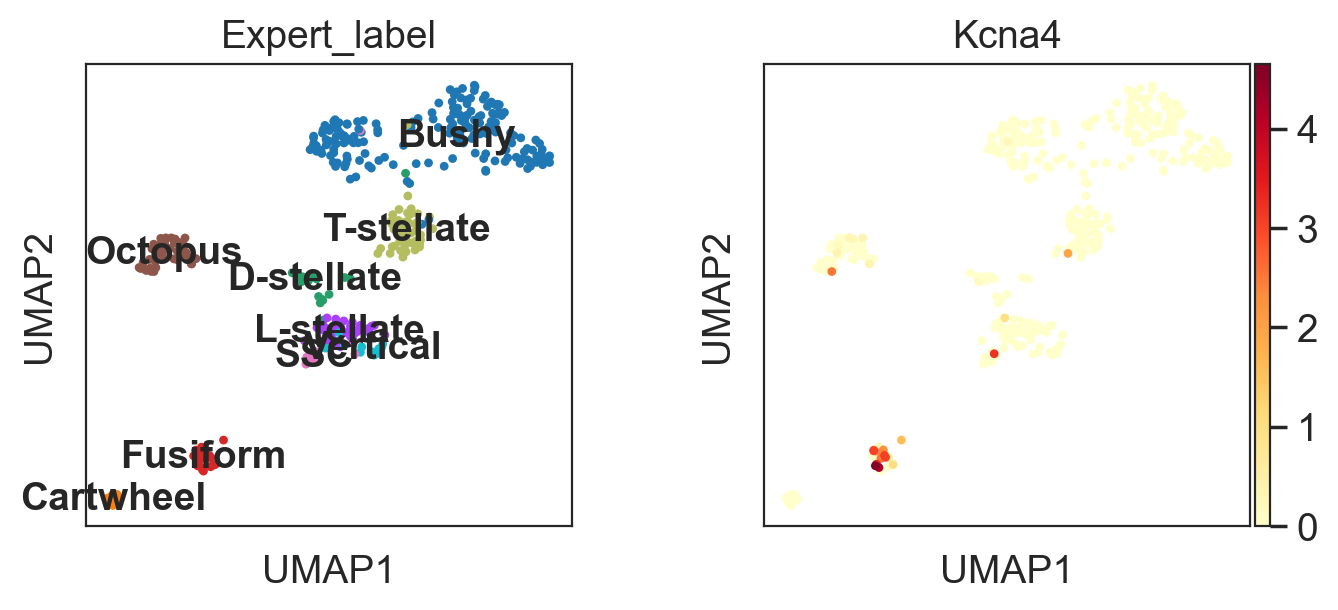

In [4]:
rcParams['figure.figsize'] = 3, 3
sc.pl.umap(pseq,color =  ['Expert_label','Kcna4'],
           legend_loc = 'on data',#palette = {'T-Fn1': 'salmon', 'T-Dchs2': 'maroon'},
           cmap = 'YlOrRd',size = 40,#save = 'T-umap.pdf'
          )

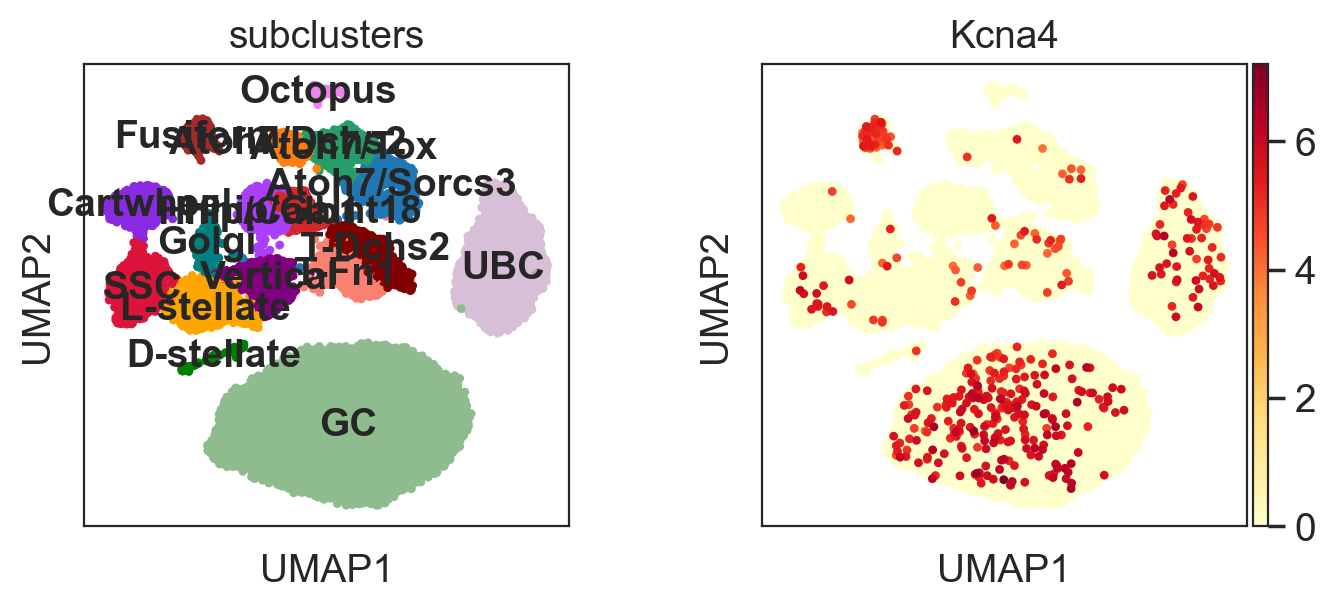

In [5]:
rcParams['figure.figsize'] = 3, 3
sc.pl.umap(neuall,color =  ['subclusters','Kcna4'],
           legend_loc = 'on data',#palette = {'T-Fn1': 'salmon', 'T-Dchs2': 'maroon'},
           cmap = 'YlOrRd',size = 40,#save = 'T-umap.pdf'
          )

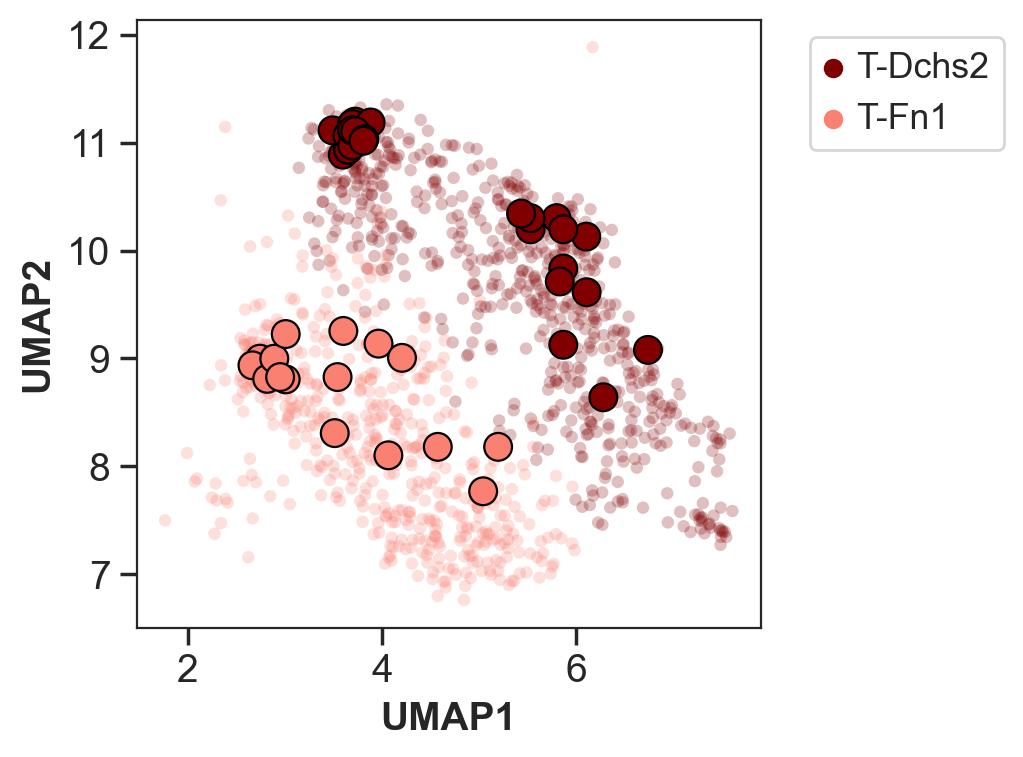

In [6]:
index = t_ref.obs_names
umap1 = pd.DataFrame(t_ref.obsm['X_umap'],index = index)
df = sc.get.obs_df(t_ref, ['subclusters'])
df['umapX']= umap1[0]
df['umapY']= umap1[1]
df = df.reset_index()

palette = {'T-Fn1': 'salmon', 'T-Dchs2': 'maroon'}

rcParams['figure.figsize'] = 4, 4
sns.scatterplot(df['umapX'],df['umapY'],s = 20,
                    hue = df['subclusters'], 
                    palette = palette,
                    edgecolor="none",legend=False,
                    alpha = 0.25)

sns.scatterplot(ptcell.obs['10x_mapping_umapX'],ptcell.obs['10x_mapping_umapY'],s = 100,
                hue =ptcell.obs['10x_clusters_subclusters'],
                palette = palette,
                edgecolor="black",
               )

plt.xlabel("UMAP1",fontweight ='bold', size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(False)

# plt.savefig('T-cell-mapping.pdf',dpi = 300)
# plt.savefig('T-cell-mapping.png',dpi = 300)

In [7]:
from statannot import add_stat_annotation

In [8]:
ptcell = ptcell[ptcell.obs['Expert_label'].isin(['T-stellate'])].copy()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T-Fn1 v.s. T-Dchs2: t-test independent samples with Bonferroni correction, P_val=9.761e-09 stat=8.256e+00


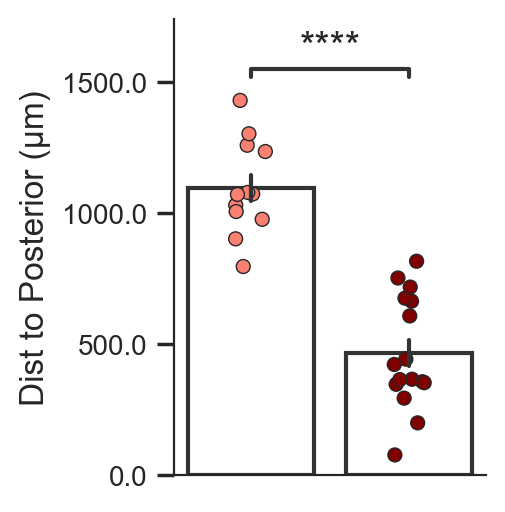

In [11]:
rcParams['figure.figsize'] = 2, 3
x = ptcell.obs["10x_clusters_subclusters"]
y = ptcell.obs["3d_loc_y"]*-1
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",order=["T-Fn1","T-Dchs2"],\
                linewidth=1.5,ci=68,errwidth = 1.5)
ax = sns.stripplot(x =x , y = y,size=5.0,linewidth=0.5,order=["T-Fn1","T-Dchs2"],
                   palette=palette,zorder=1,)
add_stat_annotation(ax, x=x, y=y, order=["T-Fn1","T-Dchs2"],
                    box_pairs=[("T-Dchs2","T-Fn1")],
                   test='t-test_ind', text_format='star', verbose=2)#, loc='outside'
plt.xlabel("")
ax.set_yticklabels(ax.get_yticks(), size = 10)
ax.set_xticks([])
plt.ylabel("Dist to Posterior (μm)", size=12)
sns.despine()
# plt.savefig('Dist to Posterior (μm).pdf',dpi = 300)
# plt.savefig('Dist to Posterior (μm).png',dpi = 300)

In [12]:
data = ptcell.obs
rcParams['figure.figsize'] = 4, 4
region = pd.DataFrame(data.groupby(['10x_clusters_subclusters']).size().reset_index(name='counts'))
# ax = sns.barplot(x =  region['Region'],y = region['counts'],hue = region['Mapping_clusters'])
# plt.xlabel('Cell Types')

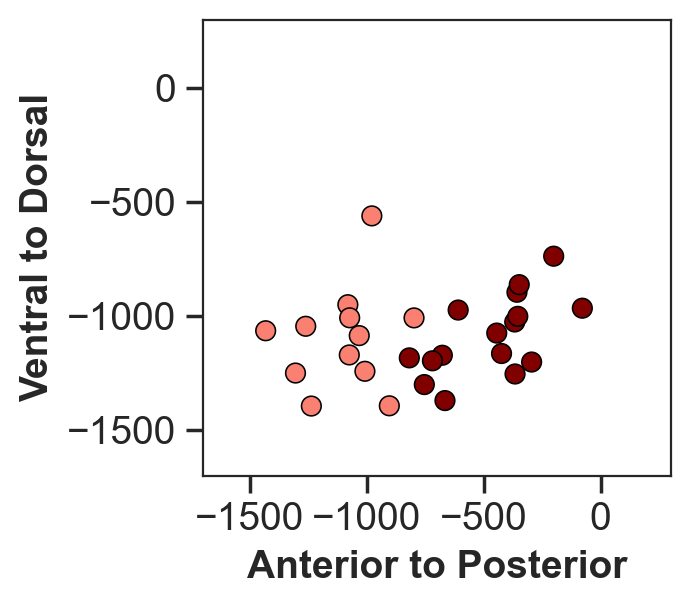

In [13]:
rcParams['figure.figsize'] = 3.0, 3.0
fig, ax = plt.subplots()

df1 = data.copy()

g = sns.scatterplot(df1['3d_loc_y'],df1['3d_loc_z'],s = 50,
                hue =df1['10x_clusters_subclusters'], 
                palette = palette,
                edgecolor="black",
                legend=False,ax = ax
                #alpha = 0.5
               )
plt.xlabel("Anterior to Posterior",fontweight ='bold', size=14)
plt.ylabel("Ventral to Dorsal", fontweight ='bold',size=14)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylim(-1700,300)
plt.xlim(-1700,300)
plt.grid(False)

# plt.savefig('T_XY_location.pdf',dpi = 300)
# plt.savefig('T_XY_location.png',dpi = 300)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T-Fn1 v.s. T-Dchs2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.065e-04 U_stat=3.890e+02


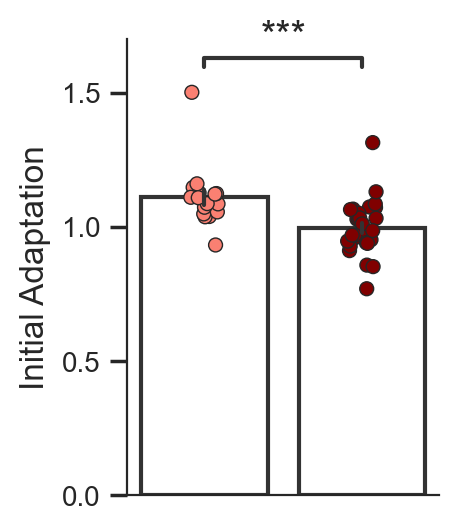

In [96]:
rcParams['figure.figsize'] = 2, 3
x = ptcell.obs["10x_clusters_subclusters"]
y = ptcell.obs["Initial Adaptation"]
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",order=["T-Fn1","T-Dchs2"],\
                linewidth=1.5,ci=68,errwidth = 1.5)
ax = sns.stripplot(x =x , y = y,size=5.0,linewidth=0.5,order=["T-Fn1","T-Dchs2"],
                   palette=palette,zorder=1,)
add_stat_annotation(ax, x=x, y=y, order=["T-Fn1","T-Dchs2"],
                    box_pairs=[("T-Dchs2","T-Fn1")],
                   test='Mann-Whitney', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
ax.set_ylim(0, 1.7) 
ax.set_yticks(np.arange(0, 1.7, 0.5))
ax.set_yticklabels(ax.get_yticks(), size = 10)
ax.set_xticks([])
plt.ylabel("Initial Adaptation", size=12)
sns.despine()

In [13]:
# rcParams['figure.figsize'] = 2, 3
# x = ptcell.obs["10x_clusters_subclusters"]
# y = ptcell.obs["Last Adaptation"]
# ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",order=["T-Fn1","T-Dchs2"],\
#                 linewidth=1.5,ci=68,errwidth = 1.5)
# ax = sns.stripplot(x =x , y = y,size=5.0,linewidth=0.5,order=["T-Fn1","T-Dchs2"],
#                    palette=palette,zorder=1,)
# add_stat_annotation(ax, x=x, y=y, order=["T-Fn1","T-Dchs2"],
#                     box_pairs=[("T-Dchs2","T-Fn1")],
#                    test='Mann-Whitney', text_format='star', verbose=2)#, loc='outside'

# plt.xlabel("")
# ax.set_ylim(0, 5.1) 
# ax.set_yticks(np.arange(0, 5.1, 1))
# ax.set_yticklabels(ax.get_yticks(), size = 10)
# ax.set_xticks([])
# plt.ylabel("Last Adaptation", size=12)
# sns.despine()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T-Fn1 v.s. T-Dchs2: t-test independent samples with Bonferroni correction, P_val=1.242e-03 stat=3.457e+00


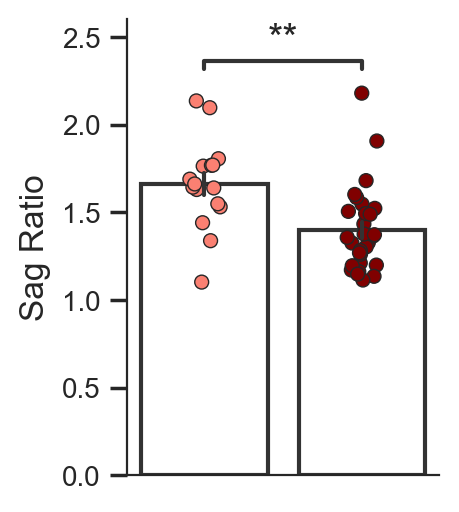

In [14]:
rcParams['figure.figsize'] = 2, 3
x = ptcell.obs["10x_clusters_subclusters"]
y = ptcell.obs["SagRatio"]
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",order=["T-Fn1","T-Dchs2"],\
                linewidth=1.5,ci=68,errwidth = 1.5)
ax = sns.stripplot(x =x , y = y,size=5.0,linewidth=0.5,order=["T-Fn1","T-Dchs2"],
                   palette=palette,zorder=1,)
add_stat_annotation(ax, x=x, y=y, order=["T-Fn1","T-Dchs2"],
                    box_pairs=[("T-Dchs2","T-Fn1")],
                   test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
ax.set_ylim(0, 2.6) 
ax.set_yticks(np.arange(0, 2.6, 0.5))
ax.set_yticklabels(ax.get_yticks(), size = 10)
ax.set_xticks([])
plt.ylabel("Sag Ratio", size=12)
sns.despine()


In [15]:
ptcell

AnnData object with n_obs × n_vars = 45 × 32232
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'T-cluster', 'T-cluster_umapX', 'T-cluster_umapY', 'Cell', 'Seq', 'Expert_label', 'recording', 'Glyt2_eGFP', 'Sst_tdTomato', 'Penk_tdTomato', '>10 gene number', '>0 gene number', 'Seq_Depth', 'STAR_mapping_rate', 'Batch', '3d_loc_x', '3d_loc_y', '3d_loc_z', '3d_loc', '10x_mapping_umapX', '10x_mapping_umapY', 'annoated_10x_clusters', '10x_clusters_subclusters', 'Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)', 'AHP (mV)', 'Depolarization Time (ms)', 'Repolarization Time (ms)', 'Half Width (ms)', 'Max Spike Number', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation', 'AP2_Diff', 'AP3_Diff', 'AP_End_Diff', 'Rebound_abs (mV)', 'Rebound_spikes', 'Spike_Delay @ 2xRheobase', 'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T-Fn1 v.s. T-Dchs2: t-test independent samples with Bonferroni correction, P_val=2.045e-09 stat=-7.554e+00


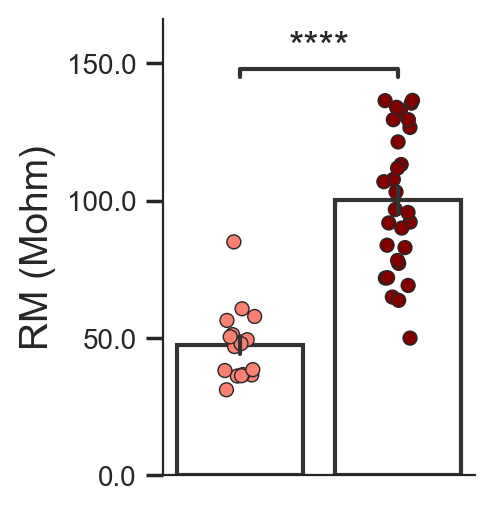

In [16]:
rcParams['figure.figsize'] = 2, 3
x = ptcell.obs["10x_clusters_subclusters"]
y = ptcell.obs["RM (Mohm)"]
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",order=["T-Fn1","T-Dchs2"],\
                linewidth=1.5,ci=68,errwidth = 1.5)
ax = sns.stripplot(x =x , y = y,size=5.0,linewidth=0.5,order=["T-Fn1","T-Dchs2"],
                   palette=palette,zorder=1,)
add_stat_annotation(ax, x=x, y=y, order=["T-Fn1","T-Dchs2"],
                    box_pairs=[("T-Dchs2","T-Fn1")],
                   test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
#ax.set_ylim(0, 2.6) 
#ax.set_yticks(np.arange(0, 2.6, 0.5))
ax.set_yticklabels(ax.get_yticks(), size = 10)
ax.set_xticks([])
#plt.ylabel("Sag Ratio", size=12)
sns.despine()


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T-Fn1 v.s. T-Dchs2: t-test independent samples with Bonferroni correction, P_val=2.187e-05 stat=-4.764e+00


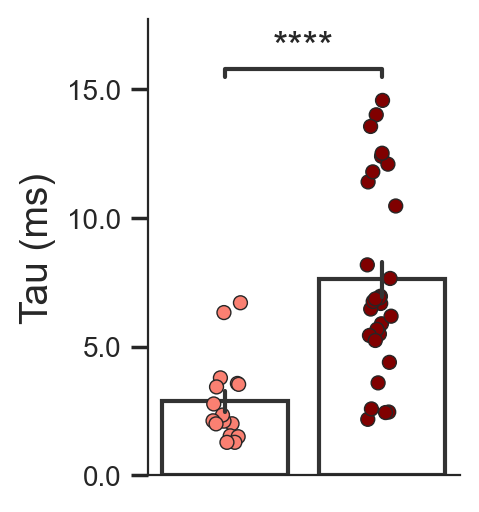

In [17]:
rcParams['figure.figsize'] = 2, 3
x = ptcell.obs["10x_clusters_subclusters"]
y = ptcell.obs["Tau (ms)"]
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",order=["T-Fn1","T-Dchs2"],\
                linewidth=1.5,ci=68,errwidth = 1.5)
ax = sns.stripplot(x =x , y = y,size=5.0,linewidth=0.5,order=["T-Fn1","T-Dchs2"],
                   palette=palette,zorder=1,)
add_stat_annotation(ax, x=x, y=y, order=["T-Fn1","T-Dchs2"],
                    box_pairs=[("T-Dchs2","T-Fn1")],
                   test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
#ax.set_ylim(0, 2.6) 
#ax.set_yticks(np.arange(0, 2.6, 0.5))
ax.set_yticklabels(ax.get_yticks(), size = 10)
ax.set_xticks([])
#plt.ylabel("Sag Ratio", size=12)
sns.despine()


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T-Fn1 v.s. T-Dchs2: t-test independent samples with Bonferroni correction, P_val=1.063e-07 stat=6.369e+00


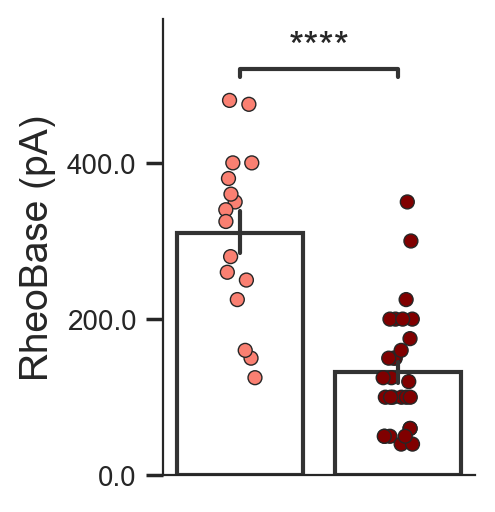

In [18]:
rcParams['figure.figsize'] = 2, 3
x = ptcell.obs["10x_clusters_subclusters"]
y = ptcell.obs["RheoBase (pA)"]
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",order=["T-Fn1","T-Dchs2"],\
                linewidth=1.5,ci=68,errwidth = 1.5)
ax = sns.stripplot(x =x , y = y,size=5.0,linewidth=0.5,order=["T-Fn1","T-Dchs2"],
                   palette=palette,zorder=1,)
add_stat_annotation(ax, x=x, y=y, order=["T-Fn1","T-Dchs2"],
                    box_pairs=[("T-Dchs2","T-Fn1")],
                   test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
#ax.set_ylim(0, 2.6) 
#ax.set_yticks(np.arange(0, 2.6, 0.5))
ax.set_yticklabels(ax.get_yticks(), size = 10)
ax.set_xticks([])
#plt.ylabel("Sag Ratio", size=12)
sns.despine()


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T-Fn1 v.s. T-Dchs2: t-test independent samples with Bonferroni correction, P_val=9.906e-03 stat=-2.699e+00


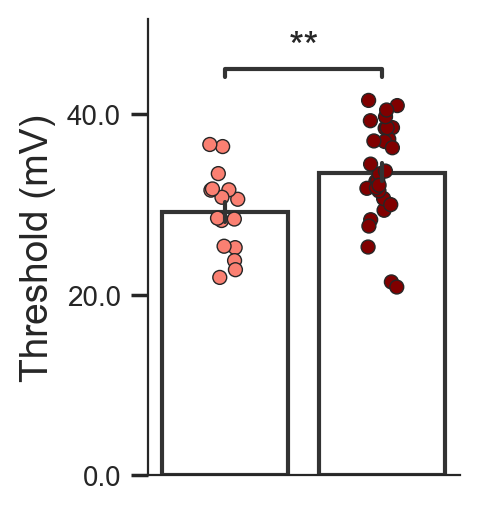

In [19]:
rcParams['figure.figsize'] = 2, 3
x = ptcell.obs["10x_clusters_subclusters"]
y = ptcell.obs["Threshold (mV)"]*-1
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",order=["T-Fn1","T-Dchs2"],\
                linewidth=1.5,ci=68,errwidth = 1.5)
ax = sns.stripplot(x =x , y = y,size=5.0,linewidth=0.5,order=["T-Fn1","T-Dchs2"],
                   palette=palette,zorder=1,)
add_stat_annotation(ax, x=x, y=y, order=["T-Fn1","T-Dchs2"],
                    box_pairs=[("T-Dchs2","T-Fn1")],
                   test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
#ax.set_ylim(0, 2.6) 
#ax.set_yticks(np.arange(0, 2.6, 0.5))
ax.set_yticklabels(ax.get_yticks(), size = 10)
ax.set_xticks([])
#plt.ylabel("Sag Ratio", size=12)
sns.despine()


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T-Fn1 v.s. T-Dchs2: t-test independent samples with Bonferroni correction, P_val=8.486e-03 stat=-2.759e+00


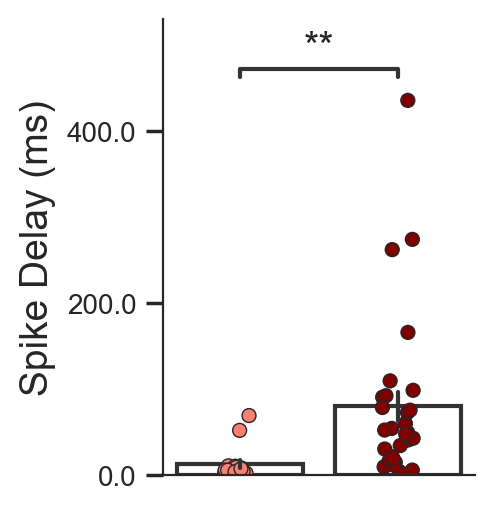

In [20]:
rcParams['figure.figsize'] = 2, 3
x = ptcell.obs["10x_clusters_subclusters"]
y = ptcell.obs["Spike Delay (ms)"]
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",order=["T-Fn1","T-Dchs2"],\
                linewidth=1.5,ci=68,errwidth = 1.5)
ax = sns.stripplot(x =x , y = y,size=5.0,linewidth=0.5,order=["T-Fn1","T-Dchs2"],
                   palette=palette,zorder=1,)
add_stat_annotation(ax, x=x, y=y, order=["T-Fn1","T-Dchs2"],
                    box_pairs=[("T-Dchs2","T-Fn1")],
                   test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
#ax.set_ylim(0, 2.6) 
#ax.set_yticks(np.arange(0, 2.6, 0.5))
ax.set_yticklabels(ax.get_yticks(), size = 10)
ax.set_xticks([])
#plt.ylabel("Sag Ratio", size=12)
sns.despine()


In [264]:
data = ptcell.obs

para = ['10x_clusters_subclusters',
        'Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)',
        'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)',
        'AHP (mV)', 'Depolarization Time (ms)', 'Repolarization Time (ms)',
        'Half Width (ms)', 'Max Spike Number', 'AP Number @ 2xRheabase','Initial Adaptation', 'Last Adaptation', 
        'AP2_Diff', 'AP3_Diff','AP_End_Diff', 
        'Rebound_abs (mV)', 'Rebound_spikes','Spike_Delay @ 2xRheobase',
        'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)', 'epsc_amp (pA)', 
        'ipsc_rise_time (ms)', 'ipsc_half_width (ms)', 'ipsc_decay_tau (ms)', 'ipsc_freq (Hz)', 'ipsc_amp (pA)']

In [265]:
df = data[data['10x_clusters_subclusters'].isin(['T-Fn1','T-Dchs2'])][para]
df_count = df.groupby('10x_clusters_subclusters')[para[1:]].count()
df_mean = df.groupby('10x_clusters_subclusters')[para[1:]].mean()
df_mean = df_mean.round(3)
df_std = df.groupby('10x_clusters_subclusters')[para[1:]].std()
df_ste = df.groupby('10x_clusters_subclusters')[para[1:]].std()/(df.groupby('10x_clusters_subclusters')[para[1:]].count())**0.5
df_ste = df_ste.round(3)

In [266]:
test = pd.DataFrame(columns = ['T-Fn1','T-Dchs2','p-values','significance','test_method'])
test['T-Fn1'] = df_mean.T['T-Fn1'].map(str) + " ± " + df_ste.T['T-Fn1'].map(str)
test['T-Dchs2'] = df_mean.T['T-Dchs2'].map(str) + " ± " + df_ste.T['T-Dchs2'].map(str)

In [267]:
import scipy.stats as stats

In [268]:
for name in para[1:]:
    df = data[data['10x_clusters_subclusters'].isin(['T-Fn1','T-Dchs2'])][['10x_clusters_subclusters',name]].dropna()
    a = df[df['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
    b = df[df['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
    s1, p1 = stats.normaltest(a)
    s2, p2 = stats.normaltest(b)
    s3, p3 = stats.levene(a,b)
    if p1 >= 0.001 and p2 >= 0.001:
        if p3 >= 0.001:
            s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
            test.loc[name]['test_method'] = 't-test_ind'
        else:
            s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
            test.loc[name]['test_method'] = 't-test_Welch'
    else:
        s, p = scipy.stats.mannwhitneyu(a,b)
        test.loc[name]['test_method'] = 'Rank_Sum'

    test.loc[name]['p-values'] = format(p,'.4f')
    if p >= 0.05:
        test.loc[name]['significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['significance'] = '*'

In [269]:
test

,T-Fn1,T-Dchs2,p-values,significance,test_method
Tau (ms),2.893 ± 0.41,7.61 ± 0.697,0.0000,***,t-test_ind
SagRatio,1.66 ± 0.063,1.397 ± 0.044,0.0007,***,Rank_Sum
Rebound (mV),7.948 ± 0.68,6.687 ± 0.576,0.1805,,t-test_ind
RM (Mohm),47.463 ± 3.367,100.214 ± 4.824,0.0000,***,t-test_ind
RMP (mV),-54.595 ± 1.038,-48.611 ± 2.321,0.1448,,Rank_Sum
RheoBase (pA),310.0 ± 27.31,132.069 ± 14.344,0.0000,***,t-test_ind
Spike Delay (ms),13.145 ± 4.77,80.01 ± 17.721,0.0000,***,Rank_Sum
Threshold (mV),-29.197 ± 1.126,-33.548 ± 1.022,0.0099,**,t-test_ind
Amplitude (mV),57.362 ± 2.166,61.938 ± 1.882,0.0504,,Rank_Sum
AHP (mV),-25.167 ± 1.291,-24.142 ± 0.887,0.5066,,t-test_ind


In [26]:
test

,T-Fn1,T-Dchs2,p-values,significance,test_method
Tau (ms),2.893 ± 0.41,7.61 ± 0.697,0.0000,***,t-test_ind
SagRatio,1.66 ± 0.063,1.397 ± 0.044,0.0007,***,Rank_Sum
Rebound (mV),7.948 ± 0.68,6.687 ± 0.576,0.1805,,t-test_ind
RM (Mohm),47.463 ± 3.367,100.214 ± 4.824,0.0000,***,t-test_ind
RMP (mV),-54.595 ± 1.038,-48.611 ± 2.321,0.1448,,Rank_Sum
RheoBase (pA),310.0 ± 27.31,132.069 ± 14.344,0.0000,***,t-test_ind
Spike Delay (ms),13.145 ± 4.77,80.01 ± 17.721,0.0000,***,Rank_Sum
Threshold (mV),-29.197 ± 1.126,-33.548 ± 1.022,0.0099,**,t-test_ind
Amplitude (mV),57.362 ± 2.166,61.938 ± 1.882,0.0504,,Rank_Sum
AHP (mV),-25.167 ± 1.291,-24.142 ± 0.887,0.5066,,t-test_ind


## significance level
#### * p < 0.05, ** p < 0.01, *** p < 0.001
##### with test method indicated in the last column
Rand_Sum test is selected if data form Bushy_Atoh7 or Bushy_Hhip failed normal distribution test (p < 0.001),
otherwise t-test is seletec as the test methond

In [32]:
test.to_csv('T-stellate_Ephysi_summary.csv')

In [33]:
data = pd.read_csv('Morpholoy_data.csv')
data = data[data['10x_clusters_subclusters'].isin(['T-Dchs2','T-Fn1'])].copy()
data = data[list(data.columns)[1:45]+['spine','10x_clusters_subclusters']].copy()#select the none-sholl analysis data
para = list(data.columns)

In [15]:
df = data[data['10x_clusters_subclusters'].isin(['T-Fn1','T-Dchs2'])][para]
df_count = df.groupby('10x_clusters_subclusters')[para[0:-1]].count()
df_mean = df.groupby('10x_clusters_subclusters')[para[0:-1]].mean()
df_mean = df_mean.round(3)
df_std = df.groupby('10x_clusters_subclusters')[para[0:-1]].std()
df_ste = df.groupby('10x_clusters_subclusters')[para[0:-1]].std()/(df.groupby('10x_clusters_subclusters')[para[0:-1]].count())**0.5
df_ste = df_ste.round(3)

In [16]:
test = pd.DataFrame(columns = ['T-Fn1','T-Dchs2','p-values','significance','test_method'])
test['T-Fn1'] = df_mean.T['T-Fn1'].map(str) + " ± " + df_ste.T['T-Fn1'].map(str)
test['T-Dchs2'] = df_mean.T['T-Dchs2'].map(str) + " ± " + df_ste.T['T-Dchs2'].map(str)

In [17]:
for name in para[0:-1]:
    df = data[data['10x_clusters_subclusters'].isin(['T-Fn1','T-Dchs2'])][['10x_clusters_subclusters',name]].dropna()
    a = df[df['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
    b = df[df['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
    #s1, p1 = stats.normaltest(a)
    p1 = 1
    s2, p2 = stats.normaltest(b)
    s3, p3 = stats.levene(a,b)
    if p1 >= 0.001 and p2 >= 0.001:
        if p3 >= 0.001:
            s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
            test.loc[name]['test_method'] = 't-test_ind'
        else:
            s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
            test.loc[name]['test_method'] = 't-test_Welch'
    else:
        s, p = scipy.stats.mannwhitneyu(a,b)
        test.loc[name]['test_method'] = 'Rank_Sum'

    test.loc[name]['p-values'] = format(p,'.4f')
    if p >= 0.05:
        test.loc[name]['significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['significance'] = '*'

NameError: name 'stats' is not defined

In [32]:
test.to_csv('T-stellate_Mor_summary.csv')

In [33]:
test

,T-Fn1,T-Dchs2,p-values,significance,test_method
branch_points,37.333 ± 8.061,50.55 ± 4.925,0.2005,,t-test_ind
width,212.787 ± 32.938,189.297 ± 25.938,0.6493,,t-test_ind
depth,148.1 ± 12.526,211.726 ± 15.557,0.0415,*,t-test_ind
width_depth_ratio,1.534 ± 0.35,1.207 ± 0.263,0.5353,,t-test_ind
squareness,1.651 ± 0.31,2.509 ± 0.243,0.0854,,t-test_ind
height,80.627 ± 18.382,88.305 ± 7.454,0.6517,,t-test_ind
tips,40.833 ± 7.872,53.7 ± 4.964,0.2133,,t-test_ind
stems,3.333 ± 0.558,2.45 ± 0.17,0.0500,*,t-test_ind
total_length,1590.197 ± 243.44,2030.283 ± 139.11,0.1384,,t-test_ind
avg_thickness,0.879 ± 0.058,0.781 ± 0.03,0.1082,,Rank_Sum


In [36]:
mdata = pd.read_csv('Morpholoy_data.csv')
mdata =mdata[mdata['10x_clusters_subclusters'].isin(['T-Fn1','T-Dchs2'])]
mdata =mdata[mdata['Expert_label'].isin(['T-stellate'])]
mdata = mdata.fillna(0)
intersection = mdata.loc[:,"intersection_10":"intersection_440"]
intersection['10x_clusters_subclusters']  = mdata['10x_clusters_subclusters']
intersection['Cell']= mdata['Cell']
intersection = intersection.reset_index()
del intersection['index']
df = pd.DataFrame(columns =['Cell','Types','Radius','Intersection'])

for i in range(0,26,1):
    df1 = pd.DataFrame(columns =['Cell','Types','Radius','Intersection'])
    df1['Intersection'] = intersection.loc[:,"intersection_10":"intersection_440"].iloc[i].values*1.0
    df1['Radius'] = range(10,450,10)
    df1['Types'] = intersection['10x_clusters_subclusters'].iloc[i]
    df1['Cell'] = intersection['Cell'].iloc[i]
    df = df.append(df1) 

df = df.reset_index()
del df['index']

In [37]:
mdata

,Cell,branch_points,width,depth,width_depth_ratio,squareness,height,tips,stems,total_length,...,length_420,length_430,length_440,spine,Expert_label,annoated_10x_clusters,10x_clusters_subclusters,Glyt2_eGFP,Sst_tdTomato,Penk_tdTomato
4,S099,53,264.98,182.73,1.450118,1.450118,68.15,56,3,2749.261906,...,0.0,0.0,0.0,0,T-stellate,0,T-Dchs2,0,0,0
10,S106,61,310.07,98.94,3.133920,3.133920,50.93,63,3,2168.127854,...,0.0,0.0,0.0,0,T-stellate,T-stellate,T-Fn1,0,0,0
12,S108,23,262.25,58.75,4.463830,4.463830,38.25,26,3,1007.196768,...,0.0,0.0,0.0,0,T-stellate,T-stellate,T-Dchs2,0,0,0
13,S109,49,361.75,191.07,1.893285,1.893285,55.77,55,2,1840.744187,...,0.0,0.0,0.0,0,T-stellate,T-stellate,T-Dchs2,0,0,0
20,S122,9,169.54,185.06,0.916135,1.091542,85.79,13,5,774.451407,...,0.0,0.0,0.0,0,T-stellate,T-stellate,T-Fn1,0,0,0
28,S136,43,223.50,148.96,1.500403,1.500403,167.29,46,2,2218.287778,...,0.0,0.0,0.0,0,T-stellate,T-stellate,T-Fn1,0,0,0
29,S138,34,259.01,159.64,1.622463,1.622463,130.17,37,2,1889.946588,...,0.0,0.0,0.0,0,T-stellate,T-stellate,T-Dchs2,0,0,0
37,S156,30,106.28,137.84,0.771039,1.296951,44.07,35,5,1151.709683,...,0.0,0.0,0.0,0,T-stellate,T-stellate,T-Fn1,0,0,0
43,S175,38,75.72,329.83,0.229573,4.355917,63.88,41,2,1279.129222,...,0.0,0.0,0.0,0,T-stellate,T-stellate,T-Dchs2,NO,0,0
50,S189,44,69.58,309.43,0.224865,4.447111,113.94,46,2,2140.140835,...,0.0,0.0,0.0,0,T-stellate,0,T-Dchs2,NO,0,0


(0.0, 300.0)

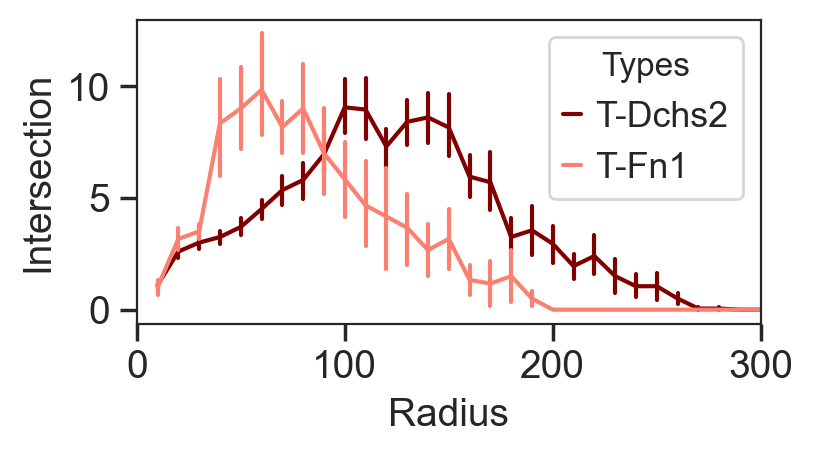

In [38]:
rcParams['figure.figsize'] = 4, 2
sns.lineplot(x=df["Radius"], y=df["Intersection"],hue = df['Types'],err_style="bars", ci=68,palette = palette)
plt.xlim(0, 300)
#plt.savefig('sholl-Intersection.pdf',dpi =300)

In [39]:
pg.mixed_anova(data = df[df["Radius"] < 100],
                dv='Intersection',
               between='Types',
               within='Radius',
               subject='Cell',
               correction= False)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Types,265.416667,1,24,265.416667,15.943823,5.363483e-04,0.399156,NaN
1,Radius,801.264957,8,192,100.158120,13.391097,2.491352e-15,0.358136,0.442158
2,Interaction,201.346154,8,192,25.168269,3.364987,1.238877e-03,0.122967,NaN


In [40]:
pg.mixed_anova(data = df[df["Radius"] >= 100],
                dv='Intersection',
               between='Types',
               within='Radius',
               subject='Cell',
               correction= False)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Types,352.923663,1,24,352.923663,11.728688,2.218516e-03,0.328271,NaN
1,Radius,7065.395604,34,816,207.805753,27.270344,5.271424e-111,0.531893,0.150771
2,Interaction,561.655824,34,816,16.519289,2.167826,1.564658e-04,0.082843,NaN


In [41]:
length = mdata.loc[:,"length_10":"length_440"]
length['10x_clusters_subclusters']  = mdata['10x_clusters_subclusters']
length['Cell']= mdata['Cell']
length = length.reset_index()
del length['index']
df = pd.DataFrame(columns =['Cell','Types','Radius','length'])
mdata =mdata[mdata['10x_clusters_subclusters'].isin(['T-Fn1','T-Dchs2'])]
for i in range(0,26,1):
    df1 = pd.DataFrame(columns =['Cell','Types','Radius','length'])
    df1['length'] = length.loc[:,"length_10":"length_440"].iloc[i].values*1.0
    df1['Radius'] = range(10,450,10)
    df1['Types'] = length['10x_clusters_subclusters'].iloc[i]
    df1['Cell'] = length['Cell'].iloc[i]
    df = df.append(df1) 

df = df.reset_index()
del df['index']

(0.0, 300.0)

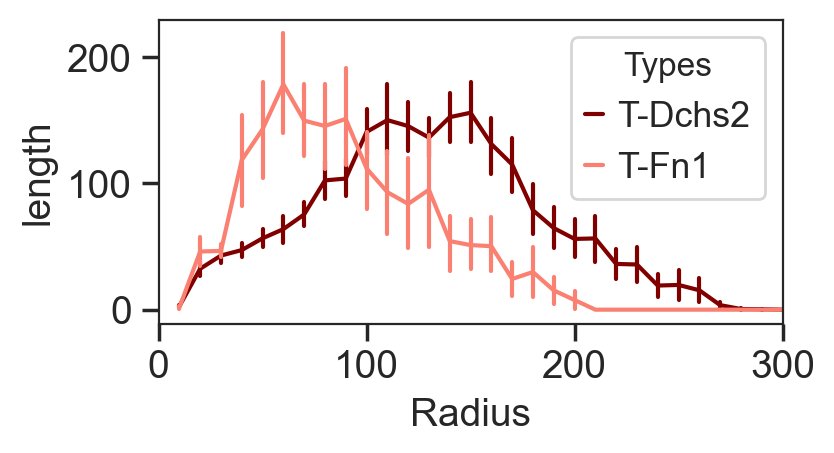

In [42]:
rcParams['figure.figsize'] = 4, 2
sns.lineplot(x=df["Radius"], y=df["length"],hue = df['Types'],err_style="bars", ci=68,palette= palette)
plt.xlim(0, 300)
#plt.savefig('sholl-length.pdf',dpi =300)

In [43]:
pg.mixed_anova(data = df[df['Radius'] < 100],
                dv='length',
               between='Types',
               within='Radius',
               subject='Cell',
               correction= False)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Types,105461.851452,1,24,105461.851452,16.638706,4.314121e-04,0.409430,NaN
1,Radius,292335.566716,8,192,36541.945840,15.968879,5.694318e-18,0.399533,0.36084
2,Interaction,58588.630100,8,192,7323.578762,3.200414,1.959955e-03,0.117660,NaN


In [44]:
pg.mixed_anova(data = df[df['Radius'] >= 100],
                dv='length',
               between='Types',
               within='Radius',
               subject='Cell',
               correction= False)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Types,1.062378e+05,1,24,106237.766078,9.151343,5.845757e-03,0.276047,NaN
1,Radius,2.352212e+06,34,816,69182.711438,26.299546,9.788987e-108,0.522859,0.135111
2,Interaction,1.660293e+05,34,816,4883.213489,1.856335,2.353956e-03,0.071794,NaN


In [45]:
fn = list(mdata[mdata['10x_clusters_subclusters'] == 'T-Fn1']['Cell'])
dc = list(mdata[mdata['10x_clusters_subclusters'] == 'T-Dchs2']['Cell'])

In [46]:
opoints = pd.read_csv('soma_coordinates.csv',index_col = 'Cell')

In [47]:
import math

In [48]:
dc_ang = np.float32([])
for name in dc:
    data =  pd.read_excel('neurolucida table/'+name+'.xlsx',sheet_name = 'Terminal Distance - Dendrites')
    for i in range(0,len(data),1):
        x = float(data.iloc[i]['Termination Coordinate'].split(", ")[0].split("(")[1])
        y = float(data.iloc[i]['Termination Coordinate'].split(", ")[1])
        xo = opoints.loc[name].x
        yo = opoints.loc[name].y
        dx = x - xo
        dy = y - yo
        if dx > 0:
            if dy >= 0:
                ang = math.atan(abs(dy)/abs(dx))/np.pi*180
            if dy < 0:
                ang = 360 - math.atan(abs(dy)/abs(dx))/np.pi*180
        if dx < 0:
            if dy >= 0:
                ang = 180 - math.atan(abs(dy)/abs(dx))/np.pi*180
            if dy < 0:
                ang = 180 + math.atan(abs(dy)/abs(dx))/np.pi*180
        if dx == 0:
            if dy > 0:
                ang = 90
            if dy < 0:
                ang = 270
        dc_ang = np.append(dc_ang,np.asarray(ang))

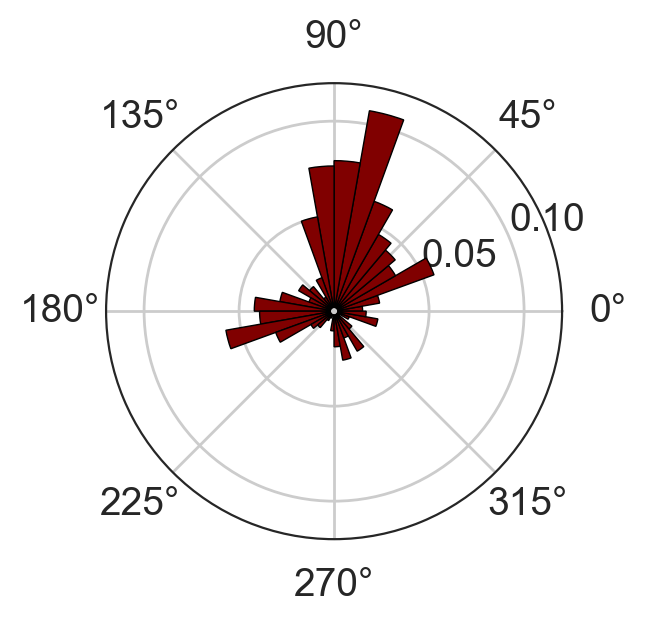

In [49]:
import matplotlib.pyplot as plt
bin_size = 10
dc_ang_hist, bins = np.histogram(dc_ang, bins=np.arange(0, 360+bin_size, bin_size))
bins = np.deg2rad(np.ediff1d(bins)//2 + bins[:-1])
rcParams['figure.figsize'] = 3.0, 3.0
ax = plt.subplot(projection='polar')
ax.bar(x= bins, height = dc_ang_hist/len(dc_ang),bottom=0.002,width=np.pi/18.0,linewidth=0.5, 
    edgecolor="black",color = 'maroon')
ax.set_rmax(0.12)
ax.set_rticks([0.05, 0.10]) 
#plt.savefig('Dchs2_termial_distribution.pdf',dpi = 300)

In [50]:
fn_ang = np.float32([])
for name in fn:
    data =  pd.read_excel('neurolucida table/'+name+'.xlsx',sheet_name = 'Terminal Distance - Dendrites')
    for i in range(0,len(data),1):
        x = float(data.iloc[i]['Termination Coordinate'].split(", ")[0].split("(")[1])
        y = float(data.iloc[i]['Termination Coordinate'].split(", ")[1])
        xo = opoints.loc[name].x
        yo = opoints.loc[name].y
        dx = x - xo
        dy = y - yo
        if dx > 0:
            if dy >= 0:
                ang = math.atan(abs(dy)/abs(dx))/np.pi*180
            if dy < 0:
                ang = 360 - math.atan(abs(dy)/abs(dx))/np.pi*180
        if dx < 0:
            if dy >= 0:
                ang = 180 - math.atan(abs(dy)/abs(dx))/np.pi*180
            if dy < 0:
                ang = 180 + math.atan(abs(dy)/abs(dx))/np.pi*180
        if dx == 0:
            if dy > 0:
                ang = 90
            if dy < 0:
                ang = 270
        fn_ang = np.append(fn_ang,np.asarray(ang))

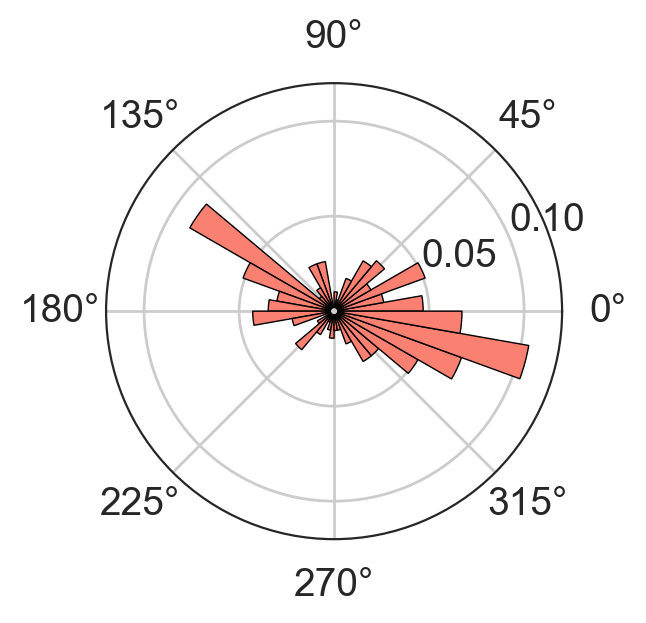

In [51]:
bin_size = 10
fn_ang_hist, bins = np.histogram(fn_ang, bins=np.arange(0, 360+bin_size, bin_size))
bins = np.deg2rad(np.ediff1d(bins)//2 + bins[:-1])
rcParams['figure.figsize'] = 3.0, 3.0
ax = plt.subplot(projection='polar')
ax.bar(x= bins, height = fn_ang_hist/len(fn_ang),bottom=0.002,width=np.pi/18.0,linewidth=0.5,
    edgecolor="black",color='salmon')
ax.set_rmax(0.12)
ax.set_rticks([0.05, 0.10]) 
#plt.savefig('Fn1_termial_distribution.pdf',dpi = 300)

In [49]:
from scipy.stats import ks_2samp

In [50]:
ks_2samp(fn_ang,dc_ang)

KstestResult(statistic=0.3253345989558614, pvalue=3.0492502565386544e-19)

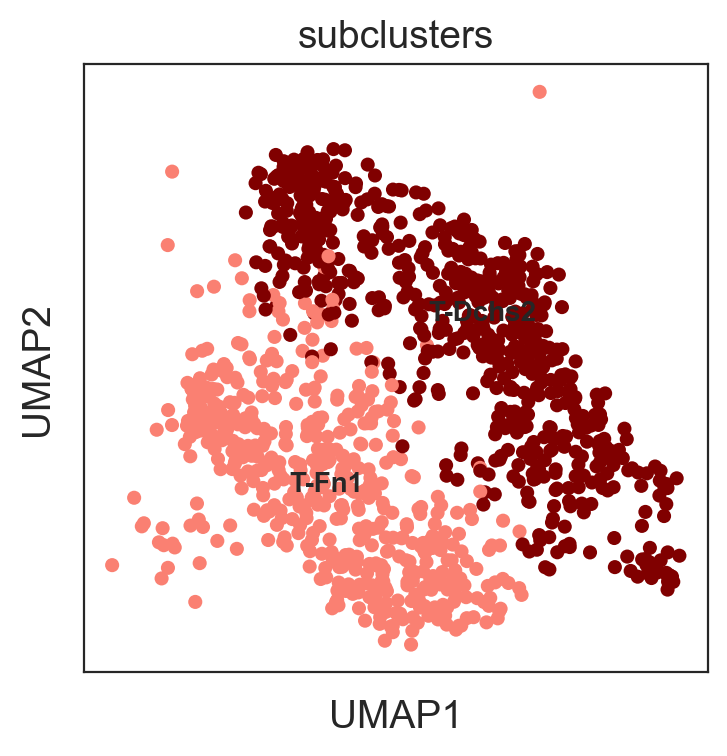

In [54]:
rcParams['figure.figsize'] = 4, 4
g = sc.pl.umap(t_ref,\
               color=['subclusters'],legend_loc = 'on data', legend_fontsize=10)

In [4]:
sc.tl.rank_genes_groups(t_ref, groupby ='subclusters')
marker = pd.DataFrame(t_ref.uns['rank_genes_groups']['names']).head(200)

In [5]:
genes_list = []
for i in range(0,2,1):
    types = ['T-Dchs2', 'T-Fn1']
    types = sorted(types)
    detected_type = types[i]
    df = sc.get.obs_df(t_ref, list(marker[detected_type])+['subclusters'])
    types.remove(detected_type)
    j = 0
    for gene in list(marker[detected_type]):
        p = pd.DataFrame(columns = types, index =['mean_df'])
        for type1 in types:
            a = df[df['subclusters'].isin([detected_type])][gene]
            b = df[df['subclusters'].isin([type1])][gene]
            if b.mean() != 0:
                p.iloc[0][type1] = a.mean()/b.mean()
            else:
                p.iloc[0][type1] =100.0
        if p.iloc[0].min() > 2.5:
            genes_list.append(gene)
            j = j + 1
            if j >= 10:
                break


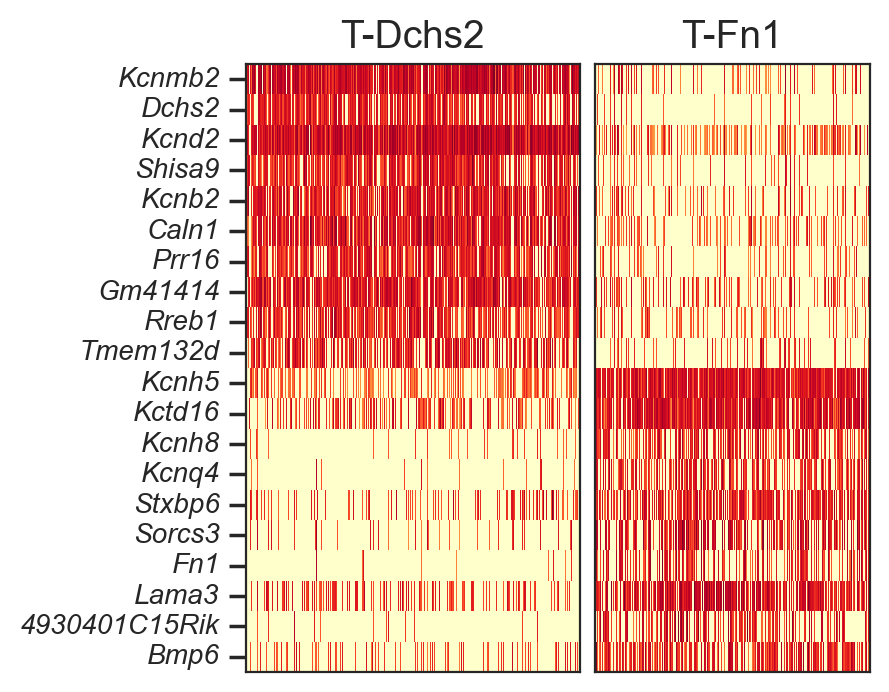

In [6]:
df = sc.get.obs_df(t_ref, genes_list+['subclusters'])

df.iloc[:, 0:-1] = df.iloc[:, 0:-1]/df.iloc[:, 0:-1].max()

rcParams['figure.figsize'] = 4, 4
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios':[639,527]})

cluster = sorted(['T-Fn1', 'T-Dchs2'])
vmax = 1
vmin = 0
g = sns.heatmap(df[df['subclusters'].isin([cluster[0]])].iloc[:, 0:-1].T,
                yticklabels=1,vmax = vmax,vmin = vmin,
                cmap="YlOrRd",cbar=False,ax=axes[0])
g.set_xlabel('')
g.set_title(cluster[0],
            rotation=0, horizontalalignment='center'
           )
g.tick_params(bottom=False)
i = 1
for lab in g.get_yticklabels():
    lab.set_style("italic")
    lab.set_fontsize(10)
for clust in cluster[1:5]:
    g = sns.heatmap(df[df['subclusters'].isin([cluster[i]])].iloc[:, 0:-1].T,
                    cmap="YlOrRd",vmax = vmax,vmin = vmin,
                    cbar=False,ax=axes[i])
    g.set_xlabel('')
    g.set_ylabel('')
    g.set_yticks([])
    g.set_title(clust,
                rotation=0, horizontalalignment='center'
               )
    g.tick_params(bottom=False)

fig.subplots_adjust(wspace=0.05)
sns.despine(top = False, right = False, left = False,bottom = False)
for ax in axes:
    ax.set_xticklabels('')


plt.savefig('T-stellate-heatmap.png',dpi = 300)
plt.show()

In [7]:
from numpy import random

In [8]:
gene_list = pd.DataFrame(t_ref.uns['rank_genes_groups']['names'])
p_adj = pd.DataFrame(t_ref.uns['rank_genes_groups']['pvals_adj'])
fc = pd.DataFrame(t_ref.uns['rank_genes_groups']['logfoldchanges'])
df = pd.DataFrame()
df['genes'] = gene_list['T-Dchs2']
df['pvals_adj'] = p_adj['T-Dchs2']
df['logfoldchanges'] = fc['T-Dchs2']
up_flag = df['logfoldchanges'] >= 1
down_flag = df['logfoldchanges'] <= -1
sig_lag = df['pvals_adj'] < 0.01
df.loc[(up_flag & sig_lag),'category'] = 'Up'
df.loc[(down_flag & sig_lag),'category'] = 'Down'
df.loc[((df['category'] != 'Up') & (df['category'] != 'Down')), 'category'] = 'not significant'
df['gene'] = df['genes']
df = df.set_index(['genes'])
df['-log10(pvals_adj)'] = np.log10(df['pvals_adj'])*-1
random.seed(7)
df.loc[df['pvals_adj'] == 0,'-log10(pvals_adj)'] = 307 + random.randint(100, size=(len(df.loc[df['pvals_adj'] == 0])))

In [9]:
palette={'Up':'maroon','Down':'salmon',
         'not significant':'gray'}

In [17]:
10**(0.677495)

4.758773122172525

In [12]:
df[df['gene'] =='Kcna4']

,pvals_adj,logfoldchanges,category,gene,-log10(pvals_adj)
genes,,,,,
Kcna4,0.210138,1.404624,not significant,Kcna4,0.677495


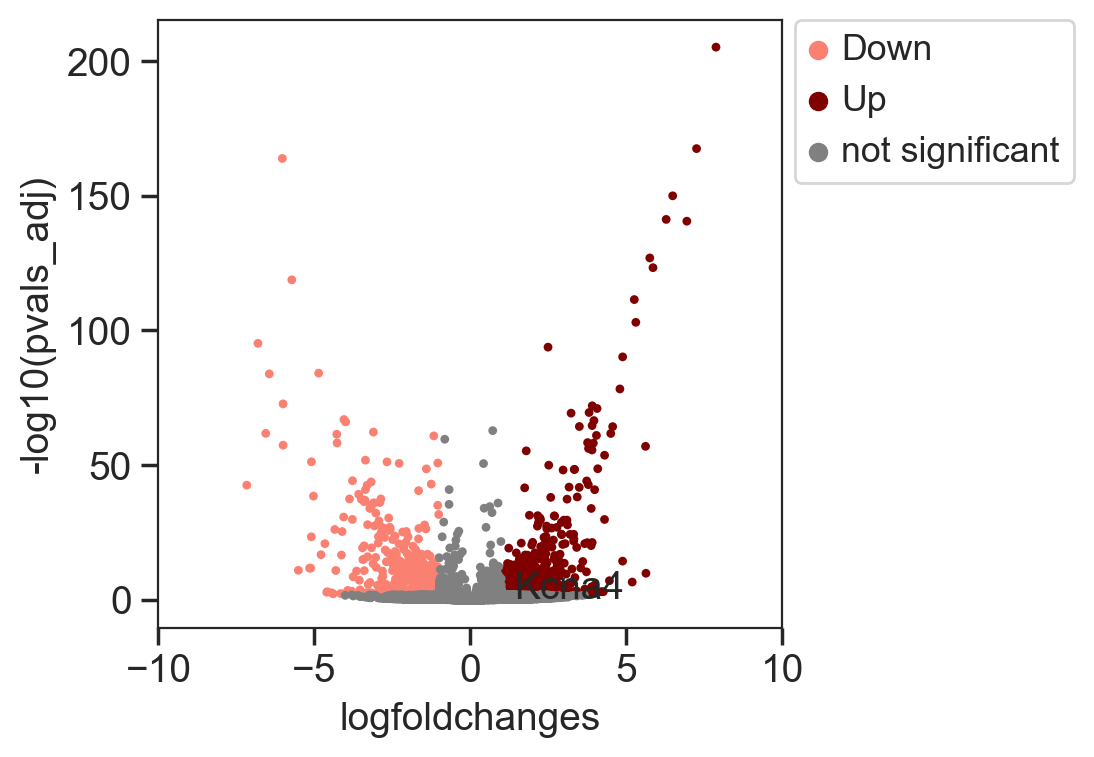

In [11]:
rcParams['figure.figsize'] = 4, 4
df = df.sort_values(by=['category'])
ax = sns.scatterplot(x = df['logfoldchanges'],y = df['-log10(pvals_adj)'],
                     edgecolor="none",
                     hue = df['category'],
                     palette=palette,
                     s=10)
plt.xlabel('logfoldchanges')
plt.ylabel('-log10(pvals_adj)')
plt.xlim(-10,10)
#plt.ylim(-0,250)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

genes = [#'Kcnb2',#Kv2.2 Shab-like
# 'Kcnc2',#Kv3.2 Shal-like
# 'Kcnd2',#Kv4.2 Shaw-like
# 'Kcnd3',#Kv4.3 Shaw-like
# 'Kcnq2',#Kv7.2
# 'Kcnq3',#Kv7.3
# 'Kcnq4',#Kv7.4
# 'Kcns3',#Kv9.3       
# 'Kcnh5',#Kv10.2
# 'Kcnh8',#Kv12.1
# 'Kcnma1',#KCa1.1 BK
# 'Kcnmb2',
# 'Kcnk9',#K2P9.1
# 'Kcnk10',#K2P10.1  
# 'Kcnk12',#K2P12.1
#'Cacna1e'
'Kcna4'


        ]

for gene in genes:
    y = df.loc[gene]['-log10(pvals_adj)']
    x = df.loc[gene]['logfoldchanges']
    ax.text(x,y,gene)
    
#plt.savefig('T-volcano.pdf',dpi = 300)

In [216]:
import umap
from itertools import combinations
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import sklearn.cluster as cluster

In [217]:
j = 0
for l in list(combinations(features,10)):
    j = j + 1
    l = list(l)
    adata = ptcell.obs[l]
    scaled_features = StandardScaler().fit_transform(adata.values)
    kmeans_labels = cluster.KMeans(n_clusters=2,random_state=0).fit_predict(scaled_features)
    pred_labs = kmeans_labels.astype('object')
    x_true = ptcell.obs['10x_clusters_subclusters']
    df = pd.DataFrame()
    df['10x_clusters_subclusters'] =  x_true
    df['pred'] = kmeans_labels
    for i in range(0,kmeans_labels.max()+1,1):
        pred_labs[pred_labs == i] = df[df['pred'] == i].groupby(by = ['10x_clusters_subclusters']).count()['pred'].idxmax()

    y_pred = pred_labs
    cm = confusion_matrix(x_true, y_pred)
    true_n = 0
    total_n = 0
    for i in range(0,2,1):
        true_n = true_n + cm[i,i]
        total_n = total_n + sum(cm[:,i])   
    acur_rate = true_n/total_n*100.0
    if acur_rate > 95:
        print(l,acur_rate)
print(' done')

['Tau (ms)', 'SagRatio', 'RM (Mohm)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Repolarization Time (ms)', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation'] 95.55555555555556
['Tau (ms)', 'SagRatio', 'RM (Mohm)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Half Width (ms)', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation'] 95.55555555555556
['Tau (ms)', 'SagRatio', 'RM (Mohm)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Half Width (ms)', 'Spike_Delay @ 2xRheobase', 'Initial Adaptation', 'Last Adaptation'] 95.55555555555556
['Tau (ms)', 'SagRatio', 'RM (Mohm)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'AP Number @ 2xRheabase', 'Spike_Delay @ 2xRheobase', 'Initial Adaptation', 'Last Adaptation'] 95.55555555555556
 done


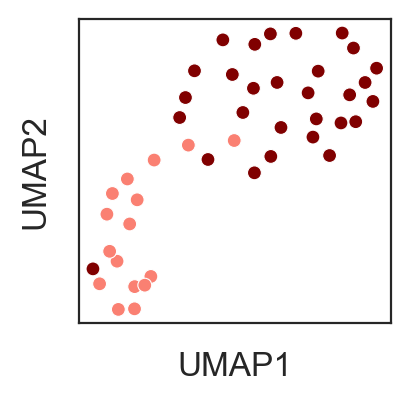

In [254]:
adata = ptcell.obs[['Tau (ms)', 'SagRatio', 'RM (Mohm)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 
                    'Repolarization Time (ms)', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation']]
adata = adata.fillna(0)
scaled_features = StandardScaler().fit_transform(adata.values)
embedding = umap.UMAP(random_state = 5, min_dist = 0.1).fit_transform(scaled_features)
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1],             
               hue =ptcell.obs['10x_clusters_subclusters'],
              palette = {'T-Fn1': 'salmon', 'T-Dchs2': 'maroon'},
               s=25,legend = False);
plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
plt.savefig('T-e-cluster.png',dpi = 300)

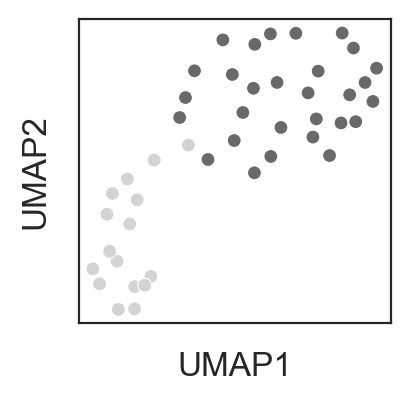

In [255]:
kmeans_labels = cluster.KMeans(n_clusters=2,random_state=0).fit_predict(scaled_features)
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1],             
               hue =kmeans_labels,
               palette = ['dimgray','lightgray'],
               s=25,legend = False);
plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
plt.savefig('T-e-cluster-kmeans.png',dpi = 300)

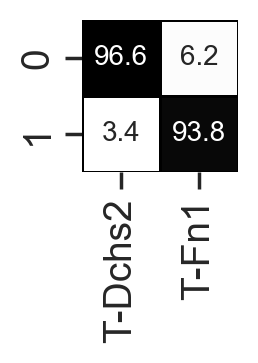

In [257]:
df = pd.DataFrame()
df['T_clusters'] =   list(ptcell.obs['10x_clusters_subclusters'])
df['pred'] = kmeans_labels
df.loc[df['pred'] == 0, 'pred_label'] = 'cluster0'
df.loc[df['pred'] == 1, 'pred_label'] = 'cluster1'
matchPairs = df.groupby(['T_clusters','pred']).count()
pCts  = ['T-Dchs2','T-Fn1',]
kCts = [0,1]
mapping = pd.DataFrame(index = pCts, columns = kCts)
mapping= mapping.fillna(0.0)
for names in pCts:
    count = matchPairs.loc[names].sum()
    name = list(matchPairs.loc[names].index)
    for n in name:
        mapping.loc[names][n] = matchPairs.loc[names,n]/count*100
rcParams['figure.figsize'] = 1.0, 1.0
ax = sns.heatmap(mapping.T, cmap='Greys',cbar=False,
                 linewidths=1, linecolor='black',annot = True, annot_kws = {'size':10},fmt='0.1f'
                )
plt.savefig('hhip_subcluster_kmeans_cm.pdf',dpi = 300)

In [204]:
from itertools import combinations
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [130]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

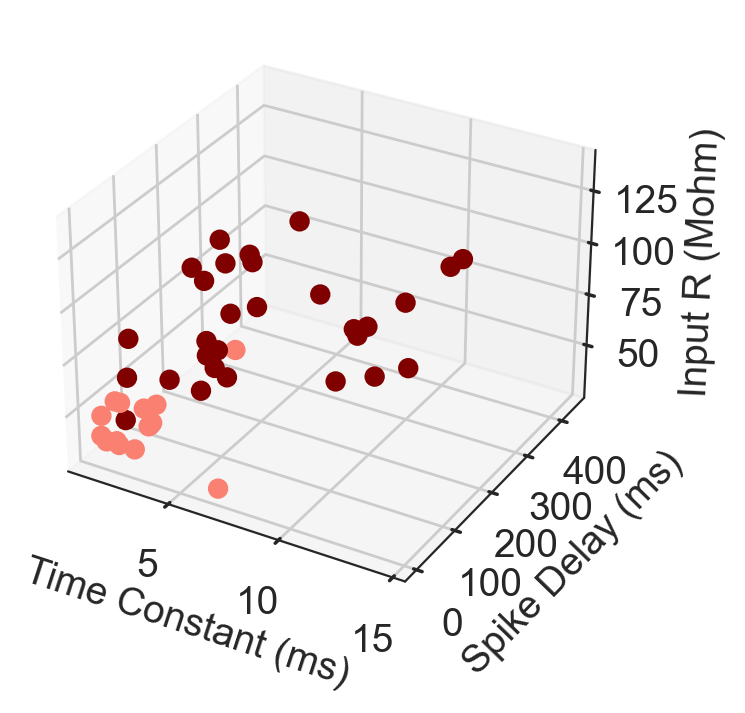

In [131]:
x = ptcell.obs["Tau (ms)"]
y = ptcell.obs["Spike Delay (ms)"]
z = ptcell.obs["RM (Mohm)"]
fig = plt.figure(figsize=(3,3))
ax = Axes3D(fig)
fig.add_axes(ax)

palette = ['salmon','maroon']
sc = ax.scatter(x, y, z, s=40, zdir='z',depthshade=False,
                c=[sns.color_palette(palette)[x] for x in ptcell.obs['10x_clusters_subclusters'].map({"T-Fn1":0, "T-Dchs2":1})])
ax.set_xlabel('Time Constant (ms)')
ax.set_ylabel('Spike Delay (ms)')
ax.set_zlabel('Input R (Mohm)')
sns.despine()
#plt.savefig('T-3d.pdf',dpi = 300)

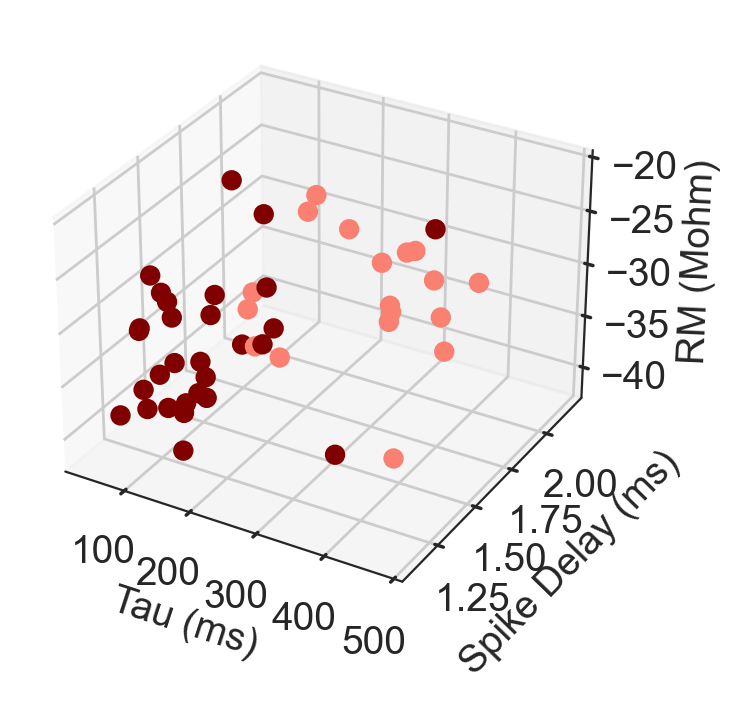

In [114]:
x = ptcell.obs["RheoBase (pA)"]
y = ptcell.obs["SagRatio"]
z = ptcell.obs["Threshold (mV)"]
fig = plt.figure(figsize=(3,3))
ax = Axes3D(fig)
fig.add_axes(ax)

palette = ['salmon','maroon']
sc = ax.scatter(x, y, z, s=40, zdir='z',depthshade=False,
                c=[sns.color_palette(palette)[x] for x in ptcell.obs['10x_clusters_subclusters'].map({"T-Fn1":0, "T-Dchs2":1})])
ax.set_xlabel('Tau (ms)')
ax.set_ylabel('Spike Delay (ms)')
ax.set_zlabel('RM (Mohm)')
sns.despine()

In [22]:
data = pd.read_csv('Morpholoy_data.csv')
data = data[data['10x_clusters_subclusters'].isin(['T-Dchs2','T-Fn1'])].copy()
data = data[list(data.columns)[1:45]+['spine','10x_clusters_subclusters']].copy()#select the none-sholl analysis data

In [23]:
mfeatures = ['branch_points',
 'width',
 'depth',
 'width_depth_ratio',
 'squareness',
 'height',
 'tips',
 'stems',
 'total_length',
 'avg_thickness',
 'max_thickness',
 'total_surface',
 'total_volume',
 'max_path_dist_to_soma',
 'max_branch_order',
 'max_path_angle',
 'min_path_angle',
 'median_path_angle',
 'mean_soma_exit_angle',
 'max_segment_path_length',
 'median_intermediate_segment_pl',
 'median_terminal_segment_pl',
 'log_max_tortuosity',
 'log_min_tortuosity',
 'log_median_tortuosity',
 'max_branch_angle',
 'min_branch_angle',
 'mean_branch_angle',
 'max_degree',
 'tree_asymmetry',
 'stem_max',
 'stem_mean',
 'stem_min',
 'dist_to_dorsal',
 'soma_perimeter',
 'soma_area',
 'soma_feret_max',
 'soma_feret_min',
 'soma_aspect_ratio',
 'soma_compactness',
 'soma_convexity',
 'soma_form_factor',
 'soma_roundness',
 'soma_solidity',]

                                       0
max_degree                      0.184615
soma_solidity                   0.135385
squareness                      0.100967
max_thickness                   0.092270
soma_feret_min                  0.092085
stem_min                        0.089235
mean_soma_exit_angle            0.087236
median_path_angle               0.086239
soma_feret_max                  0.083194
dist_to_dorsal                  0.079100
soma_area                       0.077009
total_surface                   0.076543
log_max_tortuosity              0.075957
height                          0.075723
total_volume                    0.073393
width                           0.072827
soma_perimeter                  0.071620
width_depth_ratio               0.067954
soma_compactness                0.067551
max_path_angle                  0.065528
soma_roundness                  0.064247
mean_branch_angle               0.064232
tree_asymmetry                  0.064054
log_median_tortu

Text(0.5, 0, 'Variance')

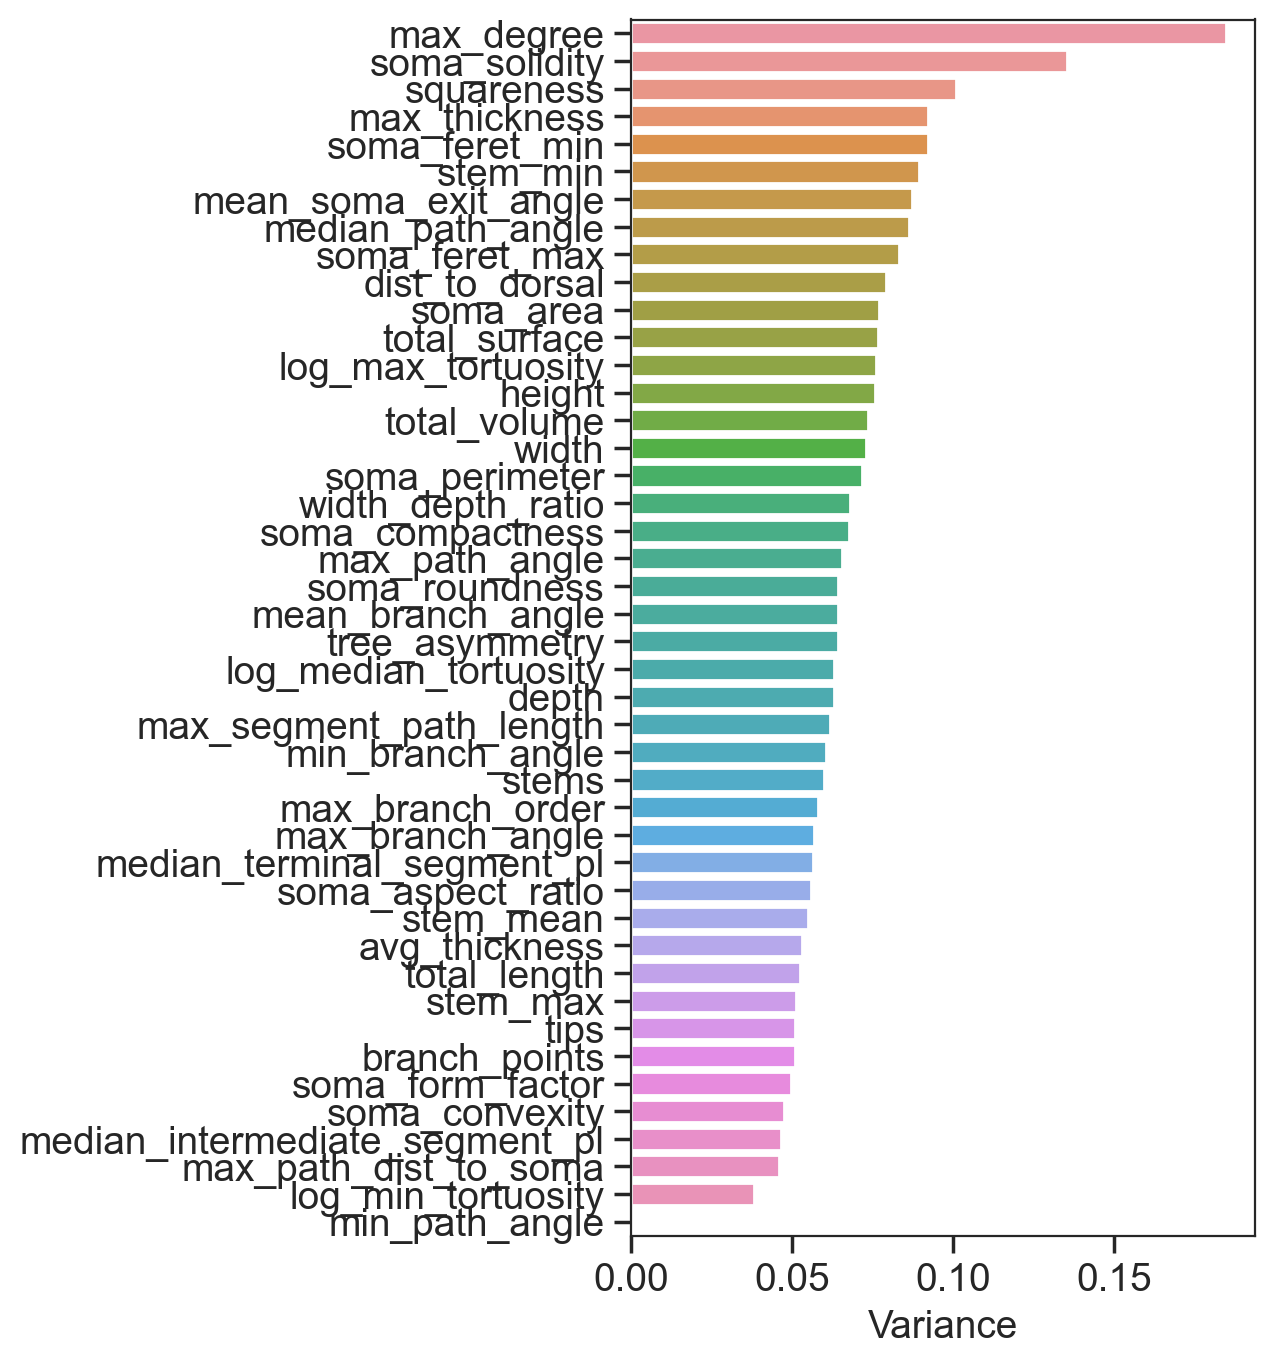

In [24]:
adata = data[mfeatures]
adata = adata - adata.min()
adata = adata/adata.max()
var = pd.DataFrame(adata.var())
var = var.sort_values(by=[0],ascending=False)
print(var)
rcParams['figure.figsize'] = 4, 8
sns.barplot(x= var[0], y = list(var.index))
plt.xlabel('Variance')

([], [])

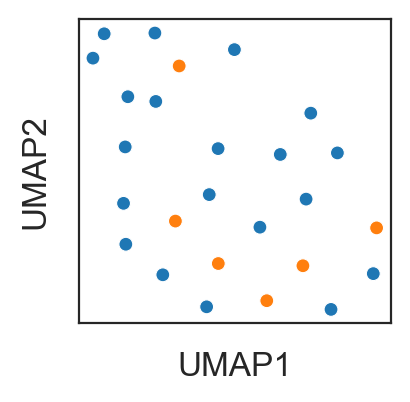

In [28]:
selected_var = var.iloc[0:15]
var_name = list(selected_var.index)
adata = data[var_name]
scaled_features = StandardScaler().fit_transform(adata.values)
embedding = umap.UMAP(random_state = 0, min_dist = 0.4, n_components = 2, n_neighbors = 10).fit_transform(scaled_features)
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1],             
               hue = data['10x_clusters_subclusters'],
              # palette = {'Bushy_Atoh7': 'royalblue', 'Bushy_Hhip': 'skyblue'},
               s=25,legend = False);
plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('Bushy-e-cluster.png',dpi = 300)

In [14]:
palette = {'T-Fn1': 'salmon', 'T-Dchs2': 'maroon'}

In [15]:
ptcell

AnnData object with n_obs × n_vars = 45 × 32232
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'T-cluster', 'T-cluster_umapX', 'T-cluster_umapY', 'Cell', 'Seq', 'Expert_label', 'recording', 'Glyt2_eGFP', 'Sst_tdTomato', 'Penk_tdTomato', '>10 gene number', '>0 gene number', 'Seq_Depth', 'STAR_mapping_rate', 'Batch', '3d_loc_x', '3d_loc_y', '3d_loc_z', '3d_loc', '10x_mapping_umapX', '10x_mapping_umapY', 'annoated_10x_clusters', '10x_clusters_subclusters', 'Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)', 'AHP (mV)', 'Depolarization Time (ms)', 'Repolarization Time (ms)', 'Half Width (ms)', 'Max Spike Number', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation', 'AP2_Diff', 'AP3_Diff', 'AP_End_Diff', 'Rebound_abs (mV)', 'Rebound_spikes', 'Spike_Delay @ 2xRheobase', 'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)'

In [45]:
df = ptcell.obs
data = df[['10x_clusters_subclusters','epsc_rise_time (ms)',
       'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)',
       'epsc_amp (pA)']]
data = data.dropna()
par = ['epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)','epsc_amp (pA)']

In [46]:
data.groupby('10x_clusters_subclusters').count()

,epsc_rise_time (ms),epsc_half_width (ms),epsc_decay_tau (ms),epsc_freq (Hz),epsc_amp (pA)
10x_clusters_subclusters,,,,,
T-Dchs2,26,26,26,26,26
T-Fn1,12,12,12,12,12


In [17]:
import scipy.stats as stats

0.7553466821033566 t-test_ind


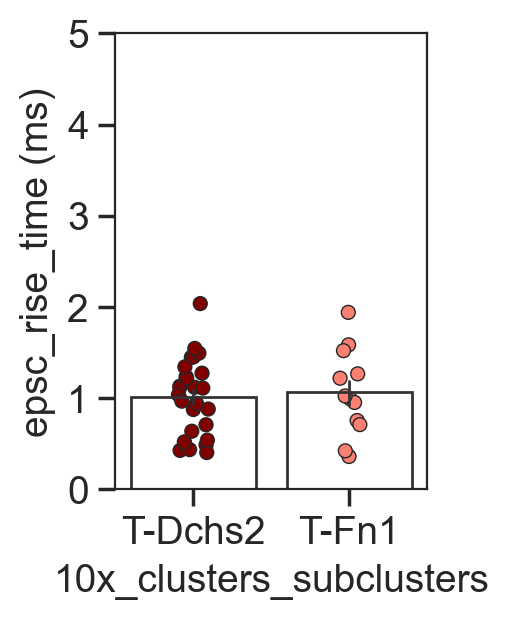

In [19]:
name = par[0]
a = data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
b = data[data['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['10x_clusters_subclusters'], y = data[name],
                    order =['T-Dchs2','T-Fn1'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['10x_clusters_subclusters'], y = data[name],
                 order =['T-Dchs2','T-Fn1'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,5])

print(p,t_method)
#plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.7984859832205797 t-test_ind


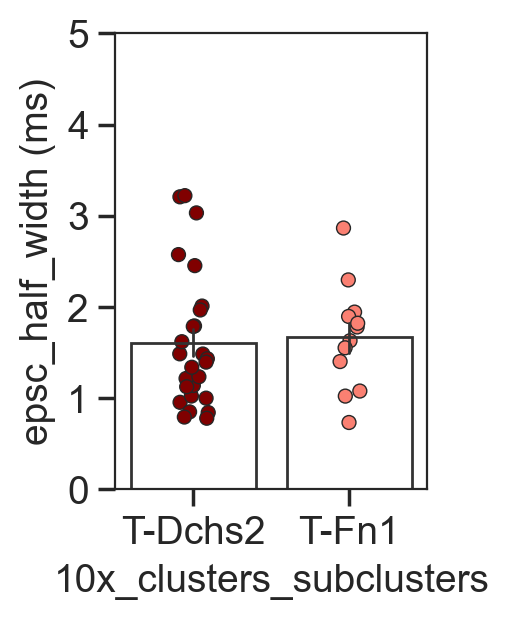

In [20]:
name = par[1]
a = data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
b = data[data['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['10x_clusters_subclusters'], y = data[name],
                    order =['T-Dchs2','T-Fn1'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['10x_clusters_subclusters'], y = data[name],
                 order =['T-Dchs2','T-Fn1'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,5])

print(p,t_method)
#plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.47416378008064486 t-test_ind


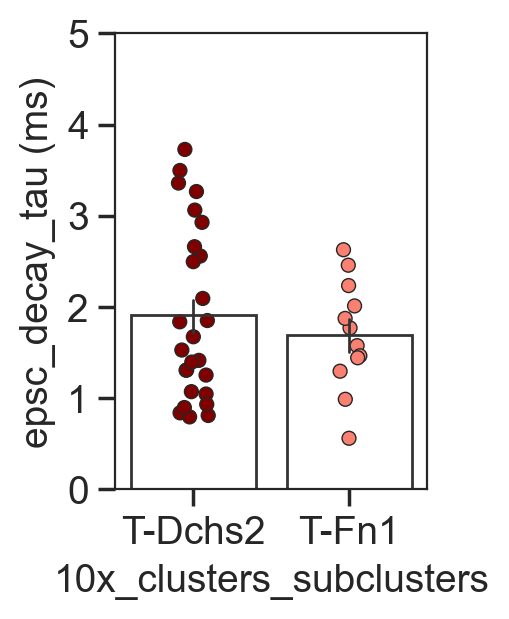

In [21]:
name = par[2]
a = data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
b = data[data['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['10x_clusters_subclusters'], y = data[name],
                    order =['T-Dchs2','T-Fn1'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['10x_clusters_subclusters'], y = data[name],
                 order =['T-Dchs2','T-Fn1'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,5])

print(p,t_method)
#plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.13171371691352318 rank-sum


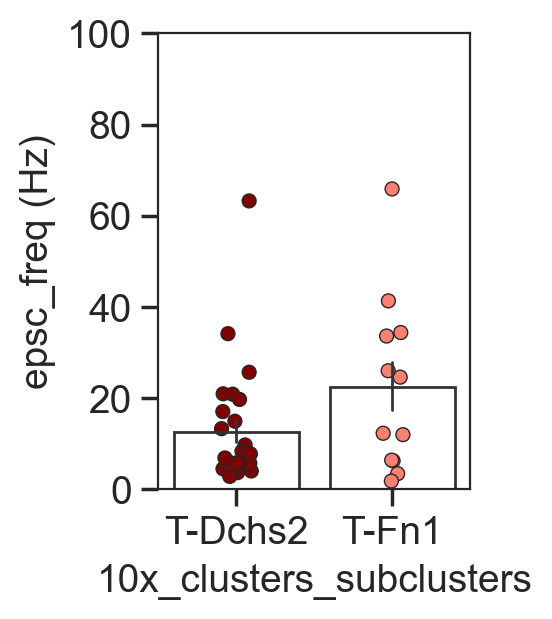

In [23]:
name = par[3]
a = data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
b = data[data['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['10x_clusters_subclusters'], y = data[name],
                    order =['T-Dchs2','T-Fn1'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['10x_clusters_subclusters'], y = data[name],
                 order =['T-Dchs2','T-Fn1'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,100])

print(p,t_method)
#plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.18368818719405527 t-test_ind


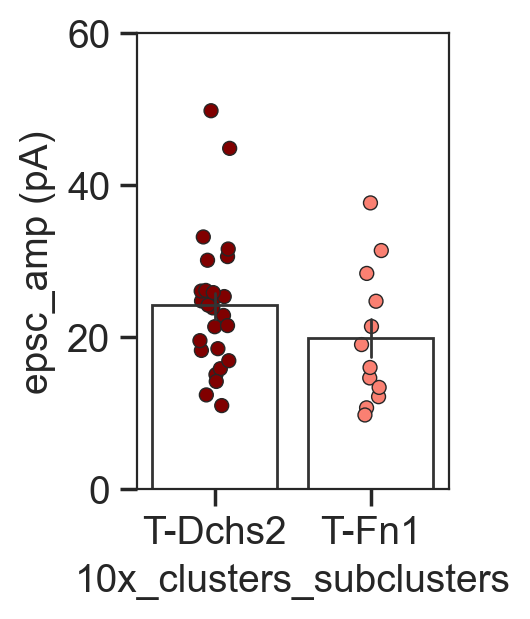

In [24]:
name = par[4]
a = data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
b = data[data['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['10x_clusters_subclusters'], y = data[name],
                    order =['T-Dchs2','T-Fn1'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['10x_clusters_subclusters'], y = data[name],
                 order =['T-Dchs2','T-Fn1'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,60])

print(p,t_method)
#plt.savefig('sp/'+name+'.pdf',dpi = 300)

(0.0, 1.05)

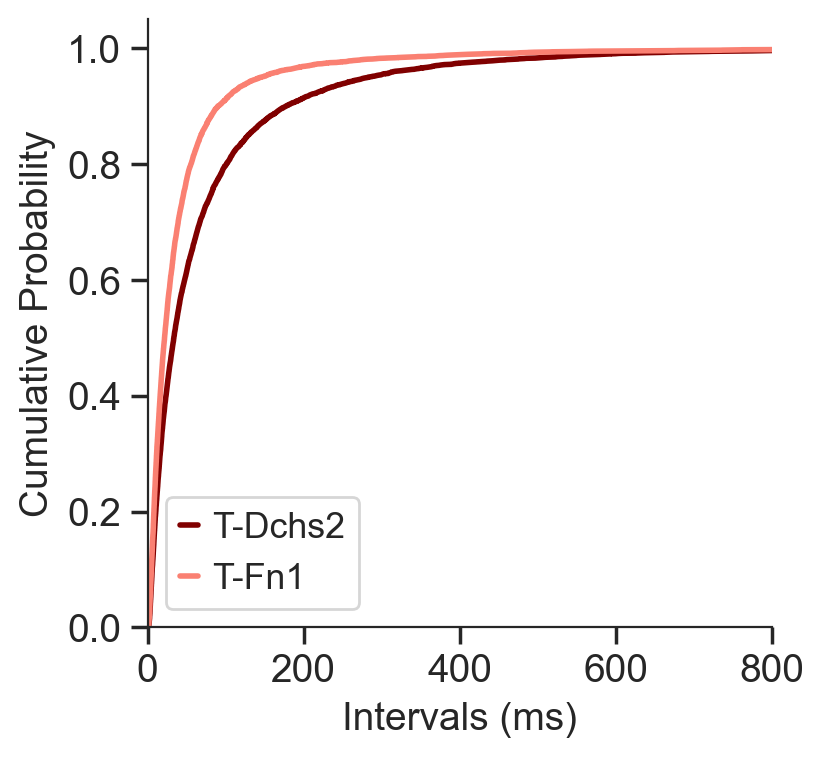

In [28]:
DIR = 'E:/final_dataset/EPSC_analysis/'

bea = pd.DataFrame()
for fn in list(data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])].index):
    bea = bea.append(pd.read_csv(DIR + fn + '_EPSC_Intervals.csv', header = None))
    
beh = pd.DataFrame()
for fn in list(data[data['10x_clusters_subclusters'].isin(['T-Fn1'])].index):
    beh = beh.append(pd.read_csv(DIR + fn + '_EPSC_Intervals.csv', header = None))

rcParams['figure.figsize'] = 4, 4
x = np.sort(bea.sort_values(by = [0])[0])
y = np.arange(len(bea)) / float(len(bea))
x1 = np.sort(beh.sort_values(by = [0])[0])
y1 = np.arange(len(beh)) / float(len(beh))
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax = plt.plot(x, y,label = "T-Dchs2",color = 'maroon',linewidth=2)
ax = plt.plot(x1, y1,label = "T-Fn1",color = 'salmon',linewidth=2)
plt.legend()
plt.xlabel('Intervals (ms)')
plt.ylabel('Cumulative Probability')
plt.xlim([0, 800])
plt.ylim([0,1.05])
#plt.savefig('sp/EPSC_Cumulative_freq.pdf',dpi = 300)

(0.0, 1.05)

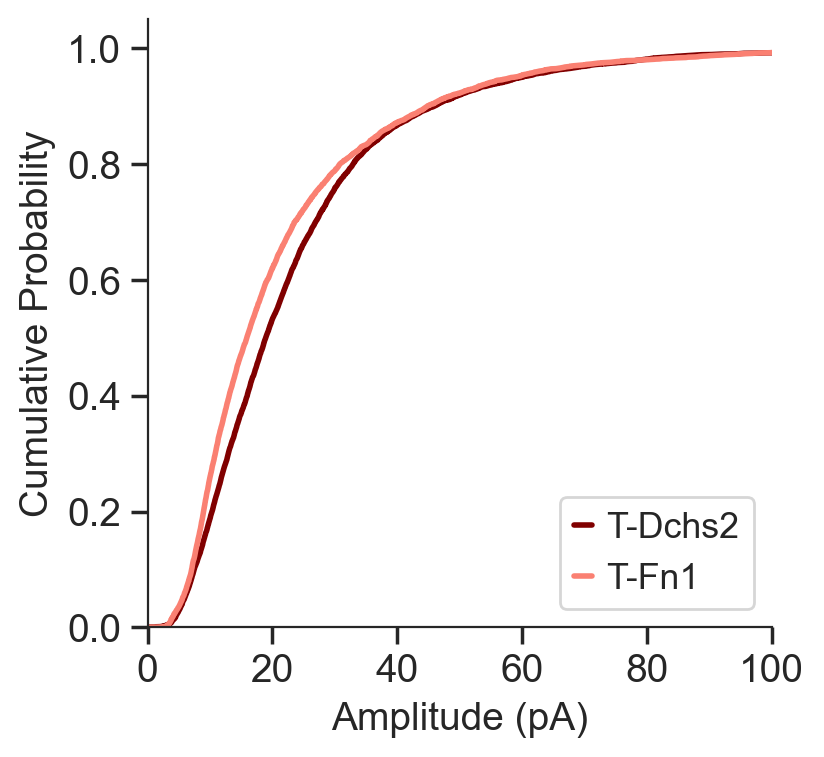

In [30]:
bea = pd.DataFrame()
for fn in list(data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])].index):
    bea = bea.append(pd.read_csv(DIR + fn + '_EPSC_amplitudes.csv', header = None))
    
beh = pd.DataFrame()
for fn in list(data[data['10x_clusters_subclusters'].isin(['T-Fn1'])].index):
    beh = beh.append(pd.read_csv(DIR + fn + '_EPSC_amplitudes.csv', header = None))

bea = bea*-1.0
beh = beh*-1.0

rcParams['figure.figsize'] = 4, 4

x = np.sort(bea.sort_values(by = [0])[0])
y = np.arange(len(bea)) / float(len(bea))
x1 = np.sort(beh.sort_values(by = [0])[0])
y1 = np.arange(len(beh)) / float(len(beh))
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax = plt.plot(x, y,label = "T-Dchs2",color = 'maroon',linewidth=2)
ax = plt.plot(x1, y1,label = "T-Fn1",color = 'salmon',linewidth=2)
plt.legend()
plt.xlabel('Amplitude (pA)')
plt.ylabel('Cumulative Probability')
plt.xlim([0, 100])
plt.ylim([0,1.05])
#plt.savefig('sp/EPSC_Cumulative_amp.pdf',dpi = 300)

In [32]:
df = ptcell.obs
data = df[['10x_clusters_subclusters', 'ipsc_rise_time (ms)', 'ipsc_half_width (ms)',
       'ipsc_decay_tau (ms)', 'ipsc_freq (Hz)', 'ipsc_amp (pA)']]
data = data.dropna()
par = ['ipsc_rise_time (ms)', 'ipsc_half_width (ms)',
       'ipsc_decay_tau (ms)', 'ipsc_freq (Hz)', 'ipsc_amp (pA)',]

In [44]:
data.groupby('10x_clusters_subclusters').count()

,ipsc_rise_time (ms),ipsc_half_width (ms),ipsc_decay_tau (ms),ipsc_freq (Hz),ipsc_amp (pA)
10x_clusters_subclusters,,,,,
T-Dchs2,25,25,25,25,25
T-Fn1,11,11,11,11,11


0.6429238322309517 rank-sum


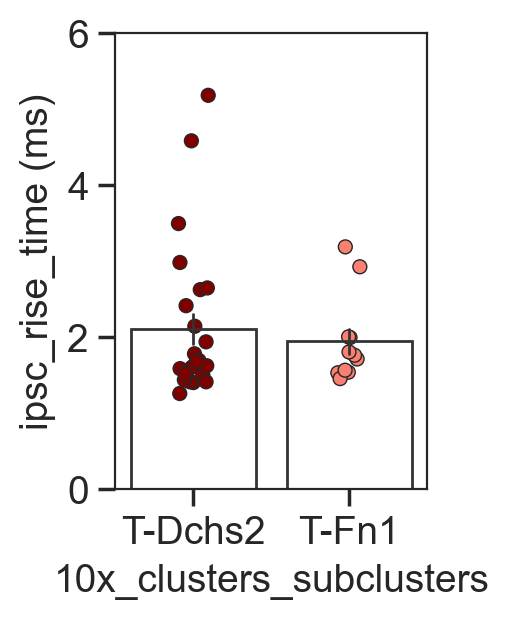

In [34]:
name = par[0]
a = data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
b = data[data['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['10x_clusters_subclusters'], y = data[name],
                    order =['T-Dchs2','T-Fn1'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['10x_clusters_subclusters'], y = data[name],
                 order =['T-Dchs2','T-Fn1'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,6])

print(p,t_method)
#plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.8345108988600479 t-test_ind


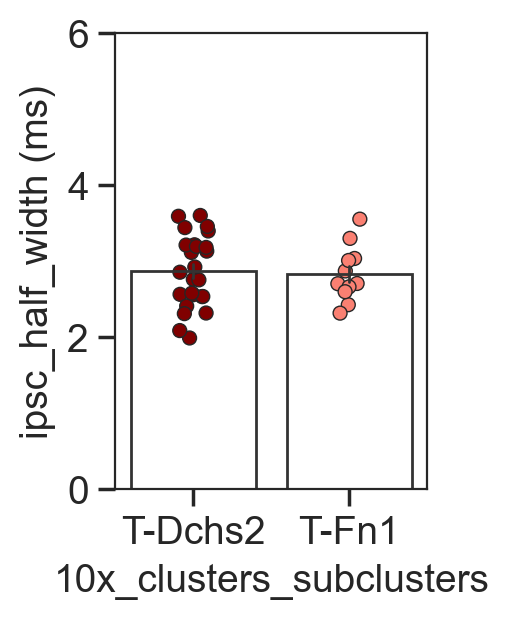

In [35]:
name = par[1]
a = data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
b = data[data['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['10x_clusters_subclusters'], y = data[name],
                    order =['T-Dchs2','T-Fn1'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['10x_clusters_subclusters'], y = data[name],
                 order =['T-Dchs2','T-Fn1'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,6])

print(p,t_method)
#plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.7778310024786185 t-test_ind


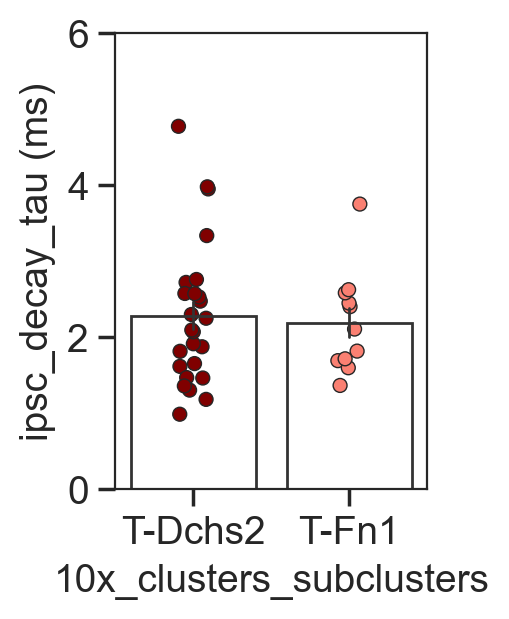

In [36]:
name = par[2]
a = data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
b = data[data['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['10x_clusters_subclusters'], y = data[name],
                    order =['T-Dchs2','T-Fn1'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['10x_clusters_subclusters'], y = data[name],
                 order =['T-Dchs2','T-Fn1'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,6])

print(p,t_method)
#plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.38118410526730206 rank-sum


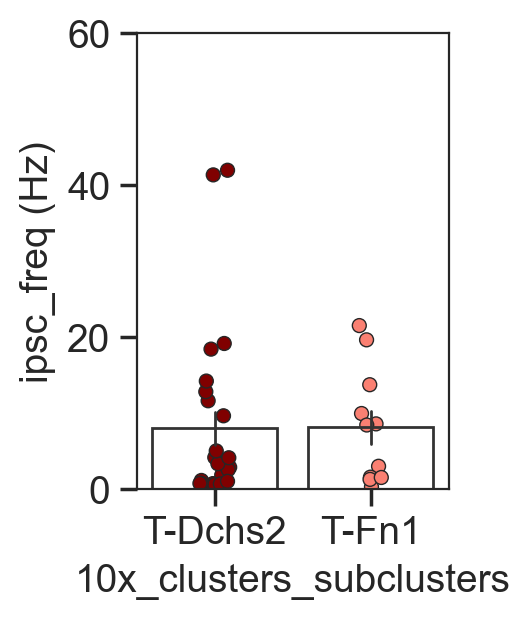

In [37]:
name = par[3]
a = data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
b = data[data['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['10x_clusters_subclusters'], y = data[name],
                    order =['T-Dchs2','T-Fn1'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['10x_clusters_subclusters'], y = data[name],
                 order =['T-Dchs2','T-Fn1'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,60])

print(p,t_method)
#plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.4397051917160566 rank-sum


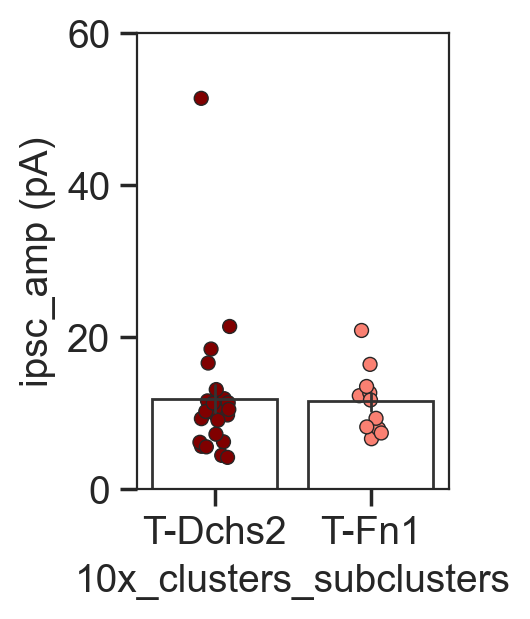

In [38]:
name = par[4]
a = data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])][name]
b = data[data['10x_clusters_subclusters'].isin(['T-Fn1'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['10x_clusters_subclusters'], y = data[name],
                    order =['T-Dchs2','T-Fn1'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['10x_clusters_subclusters'], y = data[name],
                 order =['T-Dchs2','T-Fn1'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,60])

print(p,t_method)
#plt.savefig('sp/'+name+'.pdf',dpi = 300)

(0.0, 1.05)

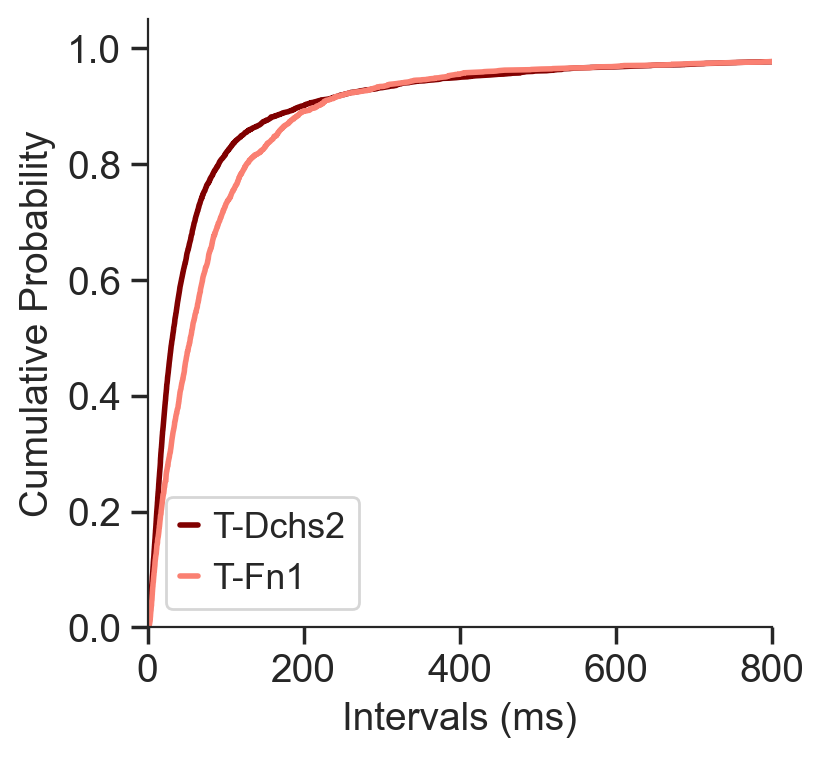

In [40]:
DIR = 'E:/final_dataset/IPSC_analysis/'

bea = pd.DataFrame()
for fn in list(data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])].index):
    bea = bea.append(pd.read_csv(DIR + fn + '_IPSC_Intervals.csv', header = None))
    
beh = pd.DataFrame()
for fn in list(data[data['10x_clusters_subclusters'].isin(['T-Fn1'])].index):
    beh = beh.append(pd.read_csv(DIR + fn + '_IPSC_Intervals.csv', header = None))

rcParams['figure.figsize'] = 4, 4
x = np.sort(bea.sort_values(by = [0])[0])
y = np.arange(len(bea)) / float(len(bea))
x1 = np.sort(beh.sort_values(by = [0])[0])
y1 = np.arange(len(beh)) / float(len(beh))
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax = plt.plot(x, y,label = "T-Dchs2",color = 'maroon',linewidth=2)
ax = plt.plot(x1, y1,label = "T-Fn1",color = 'salmon',linewidth=2)
plt.legend()
plt.xlabel('Intervals (ms)')
plt.ylabel('Cumulative Probability')
plt.xlim([0, 800])
plt.ylim([0,1.05])
#plt.savefig('sp/EPSC_Cumulative_freq.pdf',dpi = 300)

(0.0, 1.05)

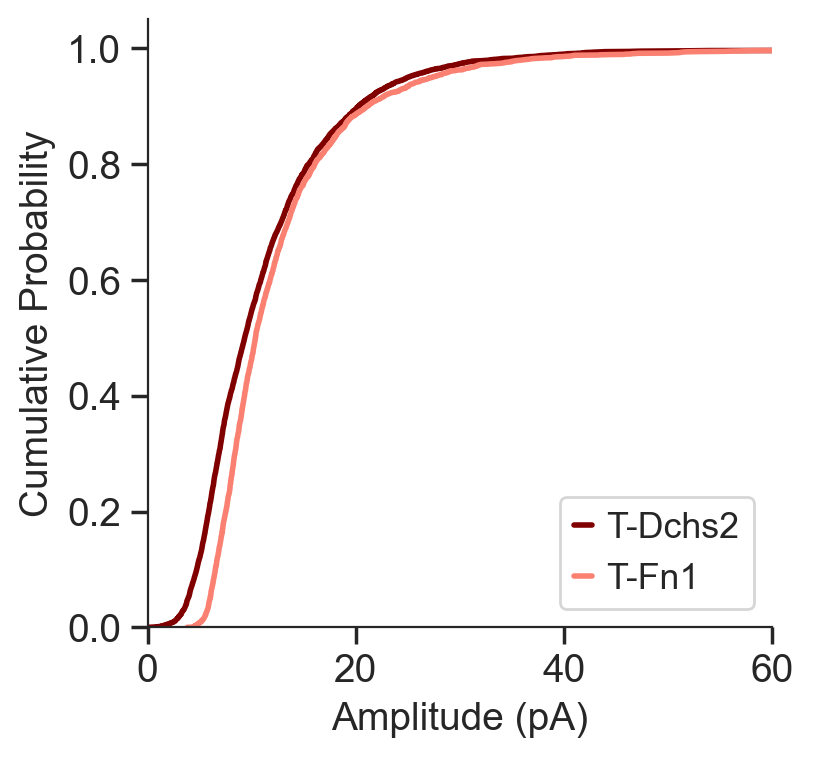

In [43]:
bea = pd.DataFrame()
for fn in list(data[data['10x_clusters_subclusters'].isin(['T-Dchs2'])].index):
    bea = bea.append(pd.read_csv(DIR + fn + '_IPSC_amplitudes.csv', header = None))
    
beh = pd.DataFrame()
for fn in list(data[data['10x_clusters_subclusters'].isin(['T-Fn1'])].index):
    beh = beh.append(pd.read_csv(DIR + fn + '_IPSC_amplitudes.csv', header = None))


rcParams['figure.figsize'] = 4, 4

x = np.sort(bea.sort_values(by = [0])[0])
y = np.arange(len(bea)) / float(len(bea))
x1 = np.sort(beh.sort_values(by = [0])[0])
y1 = np.arange(len(beh)) / float(len(beh))
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax = plt.plot(x, y,label = "T-Dchs2",color = 'maroon',linewidth=2)
ax = plt.plot(x1, y1,label = "T-Fn1",color = 'salmon',linewidth=2)
plt.legend()
plt.xlabel('Amplitude (pA)')
plt.ylabel('Cumulative Probability')
plt.xlim([0, 60])
plt.ylim([0,1.05])
#plt.savefig('sp/EPSC_Cumulative_amp.pdf',dpi = 300)